# Student Performance Prediction: Data Preprocessing & EDA

This notebook performs preprocessing, feature engineering, and exploratory data analysis on student performance data. The goal is to prepare the data for a machine learning model to predict 'Undergraduate 1st semester result (CGPA/GPA out of 4)'.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO # For loading the string data

# Set a plot style for better aesthetics
plt.style.use('ggplot')
# Optional: Configure pandas display options
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [2]:
df=pd.read_csv("Dataset/Raw/Std_dataset.csv")
# df = pd.read_csv(StringIO(data)) # Use StringIO to read the string as if it's a file

# --- 2. Basic Cleaning & Info ---
# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace('[^A-Za-z0-9_]+', '_', regex=True)
df.columns = [col.replace('_gpa_gpa_out_of_4', '_cgpa_gpa_out_of_4') if '_gpa_gpa_out_of_4' in col else col for col in df.columns] # Fix specific auto-generated name

# Rename the target column for convenience
df.rename(columns={'undergraduate_1st_semester_result_cgpa_gpa_out_of_4': 'target_cgpa_raw'}, inplace=True)


print("Shape of the dataframe:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nData types and missing values:")
df.info()

print("\nUnique values in each column (to understand categorical nature):")
for col in df.columns:
    print(f"\n--- {col} ---")
    print(f"Unique values: {df[col].nunique()}")
    print(df[col].value_counts(dropna=False).head())

Shape of the dataframe: (872, 32)

First 5 rows:
  students_age  gender     relationship_status               department type_of_university      father_s_education      mother_s_education father_s_occupation mother_s_occupation family_income_monthly_ number_of_siblings  parental_status previous_school_location previous_college_location ssc_result       hsc_result scholarship_in_ssc scholarship_in_hsc    accommodation weekly_study_time_at_home reading_scientific_books_articles_journals reading_non_scientific_books_articles_journals attendance_in_class mid_term_exam_preparation            taking_exam_preparation taking_class_note any_co_curricular_activity attend_any_seminar_related_to_department any_part_time_job smoking sports_exercise undergraduate_1st_semester_result_cgpa_gpa_out_of_4_
0  24-26 years  Female  In a love relationship                   Edtech             Public               M.Sc/M.A.               M.Sc/M.A.         Private Job         Private Job                >60,000

## II. Preprocessing

This section defines functions to clean and convert various columns into usable numerical or standardized categorical formats.

In [6]:
# Cell 3: Code (Data Loading and Initial Cleaning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO # For loading the string data

# Set a plot style for better aesthetics
plt.style.use('ggplot')
# Optional: Configure pandas display options
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

# --- 1. Data Loading ---
df=pd.read_csv("Dataset/Raw/Std_dataset.csv")

# --- 2. Basic Cleaning & Info ---
# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace('[^A-Za-z0-9_]+', '_', regex=True)
# Strip trailing underscores, unless the column name is just "_" (unlikely here but good practice)
df.columns = [col[:-1] if col.endswith('_') and len(col) > 1 else col for col in df.columns]

# Debug: Print cleaned column names to verify
print("Cleaned column names:", df.columns.tolist())

# Rename the target column for convenience
# The expected cleaned name for "Undergraduate 1st semester result (CGPA/GPA out of 4)"
# should now be "undergraduate_1st_semester_result_cgpa_gpa_out_of_4"
expected_target_col_name = 'undergraduate_1st_semester_result_cgpa_gpa_out_of_4'

if expected_target_col_name in df.columns:
    df.rename(columns={expected_target_col_name: 'target_cgpa_raw'}, inplace=True)
    print(f"\nSuccessfully renamed '{expected_target_col_name}' to 'target_cgpa_raw'")
else:
    print(f"\nERROR: Expected target column '{expected_target_col_name}' not found after cleaning.")
    print("Available columns are:", df.columns.tolist())
    # Attempt to find a similar column if exact match failed (for robustness in case of slight variations)
    potential_targets = [col for col in df.columns if 'undergraduate_1st_semester_result' in col and 'cgpa' in col]
    if potential_targets:
        print(f"Found potential target: '{potential_targets[0]}'. Attempting rename with this.")
        df.rename(columns={potential_targets[0]: 'target_cgpa_raw'}, inplace=True)
    else:
        print("Could not automatically identify and rename the target column.")


print("\nShape of the dataframe:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nData types and missing values:")
df.info()

print("\nUnique values in each column (to understand categorical nature):")
for col in df.columns: # Iterate through current columns after potential rename
    print(f"\n--- {col} ---")
    print(f"Unique values: {df[col].nunique()}")
    print(df[col].value_counts(dropna=False).head())

Cleaned column names: ['students_age', 'gender', 'relationship_status', 'department', 'type_of_university', 'father_s_education', 'mother_s_education', 'father_s_occupation', 'mother_s_occupation', 'family_income_monthly', 'number_of_siblings', 'parental_status', 'previous_school_location', 'previous_college_location', 'ssc_result', 'hsc_result', 'scholarship_in_ssc', 'scholarship_in_hsc', 'accommodation', 'weekly_study_time_at_home', 'reading_scientific_books_articles_journals', 'reading_non_scientific_books_articles_journals', 'attendance_in_class', 'mid_term_exam_preparation', 'taking_exam_preparation', 'taking_class_note', 'any_co_curricular_activity', 'attend_any_seminar_related_to_department', 'any_part_time_job', 'smoking', 'sports_exercise', 'undergraduate_1st_semester_result_cgpa_gpa_out_of_4']

Successfully renamed 'undergraduate_1st_semester_result_cgpa_gpa_out_of_4' to 'target_cgpa_raw'

Shape of the dataframe: (872, 32)

First 5 rows:
  students_age  gender     relationshi

In [7]:
# Cell 6: Code (Applying Preprocessing Functions)

# --- Apply Preprocessing ---

# First, critical check: ensure 'target_cgpa_raw' exists after Cell 3's operations
if 'target_cgpa_raw' not in df.columns:
    # This is a fatal error for this cell, stop execution or handle appropriately
    raise KeyError("CRITICAL ERROR: 'target_cgpa_raw' column not found. "
                   "Check column cleaning and renaming in Cell 3.")

df['target_cgpa_numeric'] = df['target_cgpa_raw'].apply(clean_and_map_cgpa)

# Use cleaned column names (expected to not have trailing underscores now)
df['students_age_numeric'] = df['students_age'].apply(clean_age)
df['family_income_numeric'] = df['family_income_monthly'].apply(clean_income)
df['number_of_siblings_numeric'] = df['number_of_siblings'].apply(clean_siblings)
df['ssc_result_numeric'] = df['ssc_result'].apply(clean_gpa_result)
df['hsc_result_numeric'] = df['hsc_result'].apply(clean_gpa_result)
df['weekly_study_time_numeric'] = df['weekly_study_time_at_home'].apply(clean_study_time)
df['attendance_numeric'] = df['attendance_in_class'].apply(clean_attendance)

# Binary columns (Yes/No and Male/Female)
binary_map_yes_no = {'Yes': 1, 'No': 0}
binary_cols_yes_no = [
    'scholarship_in_ssc', 'scholarship_in_hsc',
    'reading_scientific_books_articles_journals', 'reading_non_scientific_books_articles_journals',
    'any_co_curricular_activity', 'attend_any_seminar_related_to_department', 'smoking'
]
for col in binary_cols_yes_no:
    if col in df.columns:
        df[col + '_binary'] = df[col].map(binary_map_yes_no)
    else:
        print(f"Warning: Column '{col}' for binary mapping not found in DataFrame.")


df['gender_binary'] = df['gender'].map({'Male': 0, 'Female': 1})

# Ordinal columns
# Ensure your education_map in Cell 5 covers all unique values from your full dataset
education_map = {
    'Illiterate': 0, 'Primary School': 0.5,
    'Secondary School': 1, 'College': 2, 'B.A./B.Sc./Hons/Degree': 3,
    'M.Sc/M.A.': 4, 'M.Phill': 5, 'Ph.D': 6
}
# Clean education strings before mapping
df['father_s_education_cleaned'] = df['father_s_education'].str.strip()
df['mother_s_education_cleaned'] = df['mother_s_education'].str.strip()
df['fathers_education_ordinal'] = df['father_s_education_cleaned'].map(education_map)
df['mothers_education_ordinal'] = df['mother_s_education_cleaned'].map(education_map)


class_note_map = {'Never': 0, 'Sometimes': 1, 'Always': 2}
df['taking_class_note_ordinal'] = df['taking_class_note'].map(class_note_map)

sports_map = {'Never': 0, 'Sometimes': 1, 'Regularly': 2, 'Often': 2}
df['sports_exercise_ordinal'] = df['sports_exercise'].map(sports_map)

exam_prep_map = {
    'Close date to exam': 1,
    'Regular study during the semester': 2,
    'Throughout the semester': 2
}
df['taking_exam_preparation_ordinal'] = df['taking_exam_preparation'].map(exam_prep_map)


# Clean up specific categorical values
cols_to_standardize_na_other = [
    'department', 'father_s_occupation', 'mother_s_occupation', 'any_part_time_job',
    'mid_term_exam_preparation', 'relationship_status', 'type_of_university',
    'parental_status', 'previous_school_location', 'previous_college_location', 'accommodation'
]

for col in cols_to_standardize_na_other:
    if col in df.columns:
        df[col] = df[col].str.strip()
        df[col] = df[col].replace(['Not Applicable', 'Not applicable', 'N/A'], 'NA_Category', regex=False)
        df[col] = df[col].replace(['Others', 'others'], 'Other_Category', regex=False)
    else:
        print(f"Warning: Column '{col}' for NA/Other standardization not found.")


# Display processed numeric columns sample:
print("\nProcessed numeric/ordinal/binary columns sample:")
processed_cols_for_display = [
    'target_cgpa_numeric', 'students_age_numeric', 'family_income_numeric',
    'number_of_siblings_numeric', 'ssc_result_numeric', 'hsc_result_numeric',
    'weekly_study_time_numeric', 'attendance_numeric', 'gender_binary',
    'scholarship_in_ssc_binary', 'fathers_education_ordinal', 'mothers_education_ordinal', # Added mothers
    'taking_class_note_ordinal', 'sports_exercise_ordinal', 'taking_exam_preparation_ordinal'
]
# Filter out columns not yet created or if there were errors to avoid KeyError
existing_processed_cols = [p_col for p_col in processed_cols_for_display if p_col in df.columns]
if existing_processed_cols:
    print(df[existing_processed_cols].head())
    print("\nMissing values in these processed columns:")
    print(df[existing_processed_cols].isnull().sum())
else:
    print("No processed columns available for display (check for errors in their creation).")


Processed numeric/ordinal/binary columns sample:
   target_cgpa_numeric  students_age_numeric  family_income_numeric  number_of_siblings_numeric  ssc_result_numeric  hsc_result_numeric  weekly_study_time_numeric  attendance_numeric  gender_binary  scholarship_in_ssc_binary  fathers_education_ordinal  mothers_education_ordinal  taking_class_note_ordinal  sports_exercise_ordinal  taking_exam_preparation_ordinal
0                3.875                  25.0                65000.0                         2.0                 5.0               5.000                       13.0                90.0              1                          1                        4.0                        4.0                          2                      1.0                              2.0
1                3.620                  22.0                58000.0                         1.0                 5.0               5.000                        3.5                90.0              0                         

## III. Feature Engineering

Creating new features from existing ones to potentially improve model performance.

In [8]:
# --- Feature Engineering ---

# 1. Average Parental Education
# Ensure ordinal columns exist before using them
if 'fathers_education_ordinal' in df.columns and 'mothers_education_ordinal' in df.columns:
    df['avg_parental_education'] = (df['fathers_education_ordinal'].fillna(0) + df['mothers_education_ordinal'].fillna(0)) / 2
else:
    print("Warning: Parental education ordinal columns not found for 'avg_parental_education'.")
    df['avg_parental_education'] = np.nan

# 2. Total Scholarship
if 'scholarship_in_ssc_binary' in df.columns and 'scholarship_in_hsc_binary' in df.columns:
    df['total_scholarships'] = df['scholarship_in_ssc_binary'].fillna(0) + df['scholarship_in_hsc_binary'].fillna(0)
else:
    print("Warning: Scholarship binary columns not found for 'total_scholarships'.")
    df['total_scholarships'] = np.nan

# 3. Average Previous Academic Score
if 'ssc_result_numeric' in df.columns and 'hsc_result_numeric' in df.columns:
    df['avg_previous_gpa'] = (df['ssc_result_numeric'].fillna(df['ssc_result_numeric'].median()) +
                               df['hsc_result_numeric'].fillna(df['hsc_result_numeric'].median())) / 2
else:
    print("Warning: SSC/HSC numeric columns not found for 'avg_previous_gpa'.")
    df['avg_previous_gpa'] = np.nan


# 4. Study Engagement Score
study_engagement_components = []
if 'reading_scientific_books_articles_journals_binary' in df.columns:
    study_engagement_components.append(df['reading_scientific_books_articles_journals_binary'].fillna(0))
if 'reading_non_scientific_books_articles_journals_binary' in df.columns:
    study_engagement_components.append(df['reading_non_scientific_books_articles_journals_binary'].fillna(0))
if 'taking_class_note_ordinal' in df.columns:
    study_engagement_components.append(df['taking_class_note_ordinal'].fillna(0)) # Assuming 0 is a sensible fill
if 'taking_exam_preparation_ordinal' in df.columns:
    study_engagement_components.append(df['taking_exam_preparation_ordinal'].fillna(0)) # Assuming 0 is a sensible fill

if study_engagement_components:
    df['study_engagement_score'] = sum(study_engagement_components)
else:
    print("Warning: Not enough components for 'study_engagement_score'.")
    df['study_engagement_score'] = np.nan


# 5. Mother is Housewife
if 'mother_s_occupation' in df.columns:
    df['mother_is_housewife'] = (df['mother_s_occupation'] == 'Housewife').astype(int)
else:
    df['mother_is_housewife'] = np.nan # or 0 if you prefer


# 6. Positive Engagement Count
positive_engagement_cols = []
if 'any_co_curricular_activity_binary' in df.columns:
    positive_engagement_cols.append(df['any_co_curricular_activity_binary'].fillna(0))
if 'attend_any_seminar_related_to_department_binary' in df.columns:
    positive_engagement_cols.append(df['attend_any_seminar_related_to_department_binary'].fillna(0))
if 'sports_exercise_ordinal' in df.columns:
    positive_engagement_cols.append((df['sports_exercise_ordinal'].fillna(0) > 0).astype(int)) # Binarize: 0 if Never, 1 otherwise

if positive_engagement_cols:
    df['positive_engagement_count'] = sum(positive_engagement_cols)
else:
    print("Warning: Not enough components for 'positive_engagement_count'.")
    df['positive_engagement_count'] = np.nan


print("\nEngineered features sample:")
engineered_features_to_display = [
    'avg_parental_education', 'total_scholarships', 'avg_previous_gpa',
    'study_engagement_score', 'mother_is_housewife', 'positive_engagement_count', 'target_cgpa_numeric'
]
existing_engineered_features = [col for col in engineered_features_to_display if col in df.columns]
if existing_engineered_features:
    print(df[existing_engineered_features].head())
else:
    print("No engineered features to display.")




Engineered features sample:
   avg_parental_education  total_scholarships  avg_previous_gpa  study_engagement_score  mother_is_housewife  positive_engagement_count  target_cgpa_numeric
0                     4.0                   2            5.0000                     5.0                    0                          3                3.875
1                     3.0                   1            5.0000                     4.0                    1                          3                3.620
2                     1.0                   0            4.7475                     2.0                    1                          1                3.370
3                     2.5                   1            5.0000                     3.0                    1                          1                3.120
4                     1.5                   1            5.0000                     5.0                    1                          3                3.875


## IV. Exploratory Data Analysis (EDA)

Visualizing the data to understand distributions, relationships, and potential patterns.

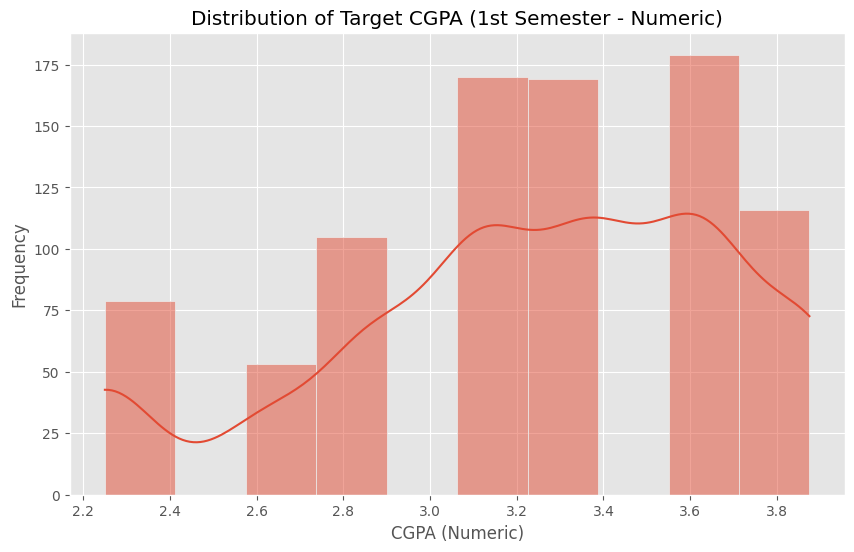

In [10]:
if 'target_cgpa_numeric' in df.columns and not df['target_cgpa_numeric'].isnull().all():
    plt.figure(figsize=(10, 6))
    sns.histplot(df['target_cgpa_numeric'].dropna(), kde=True, bins=10)
    plt.title('Distribution of Target CGPA (1st Semester - Numeric)')
    plt.xlabel('CGPA (Numeric)')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Target variable 'target_cgpa_numeric' not available or all NaN for EDA.")

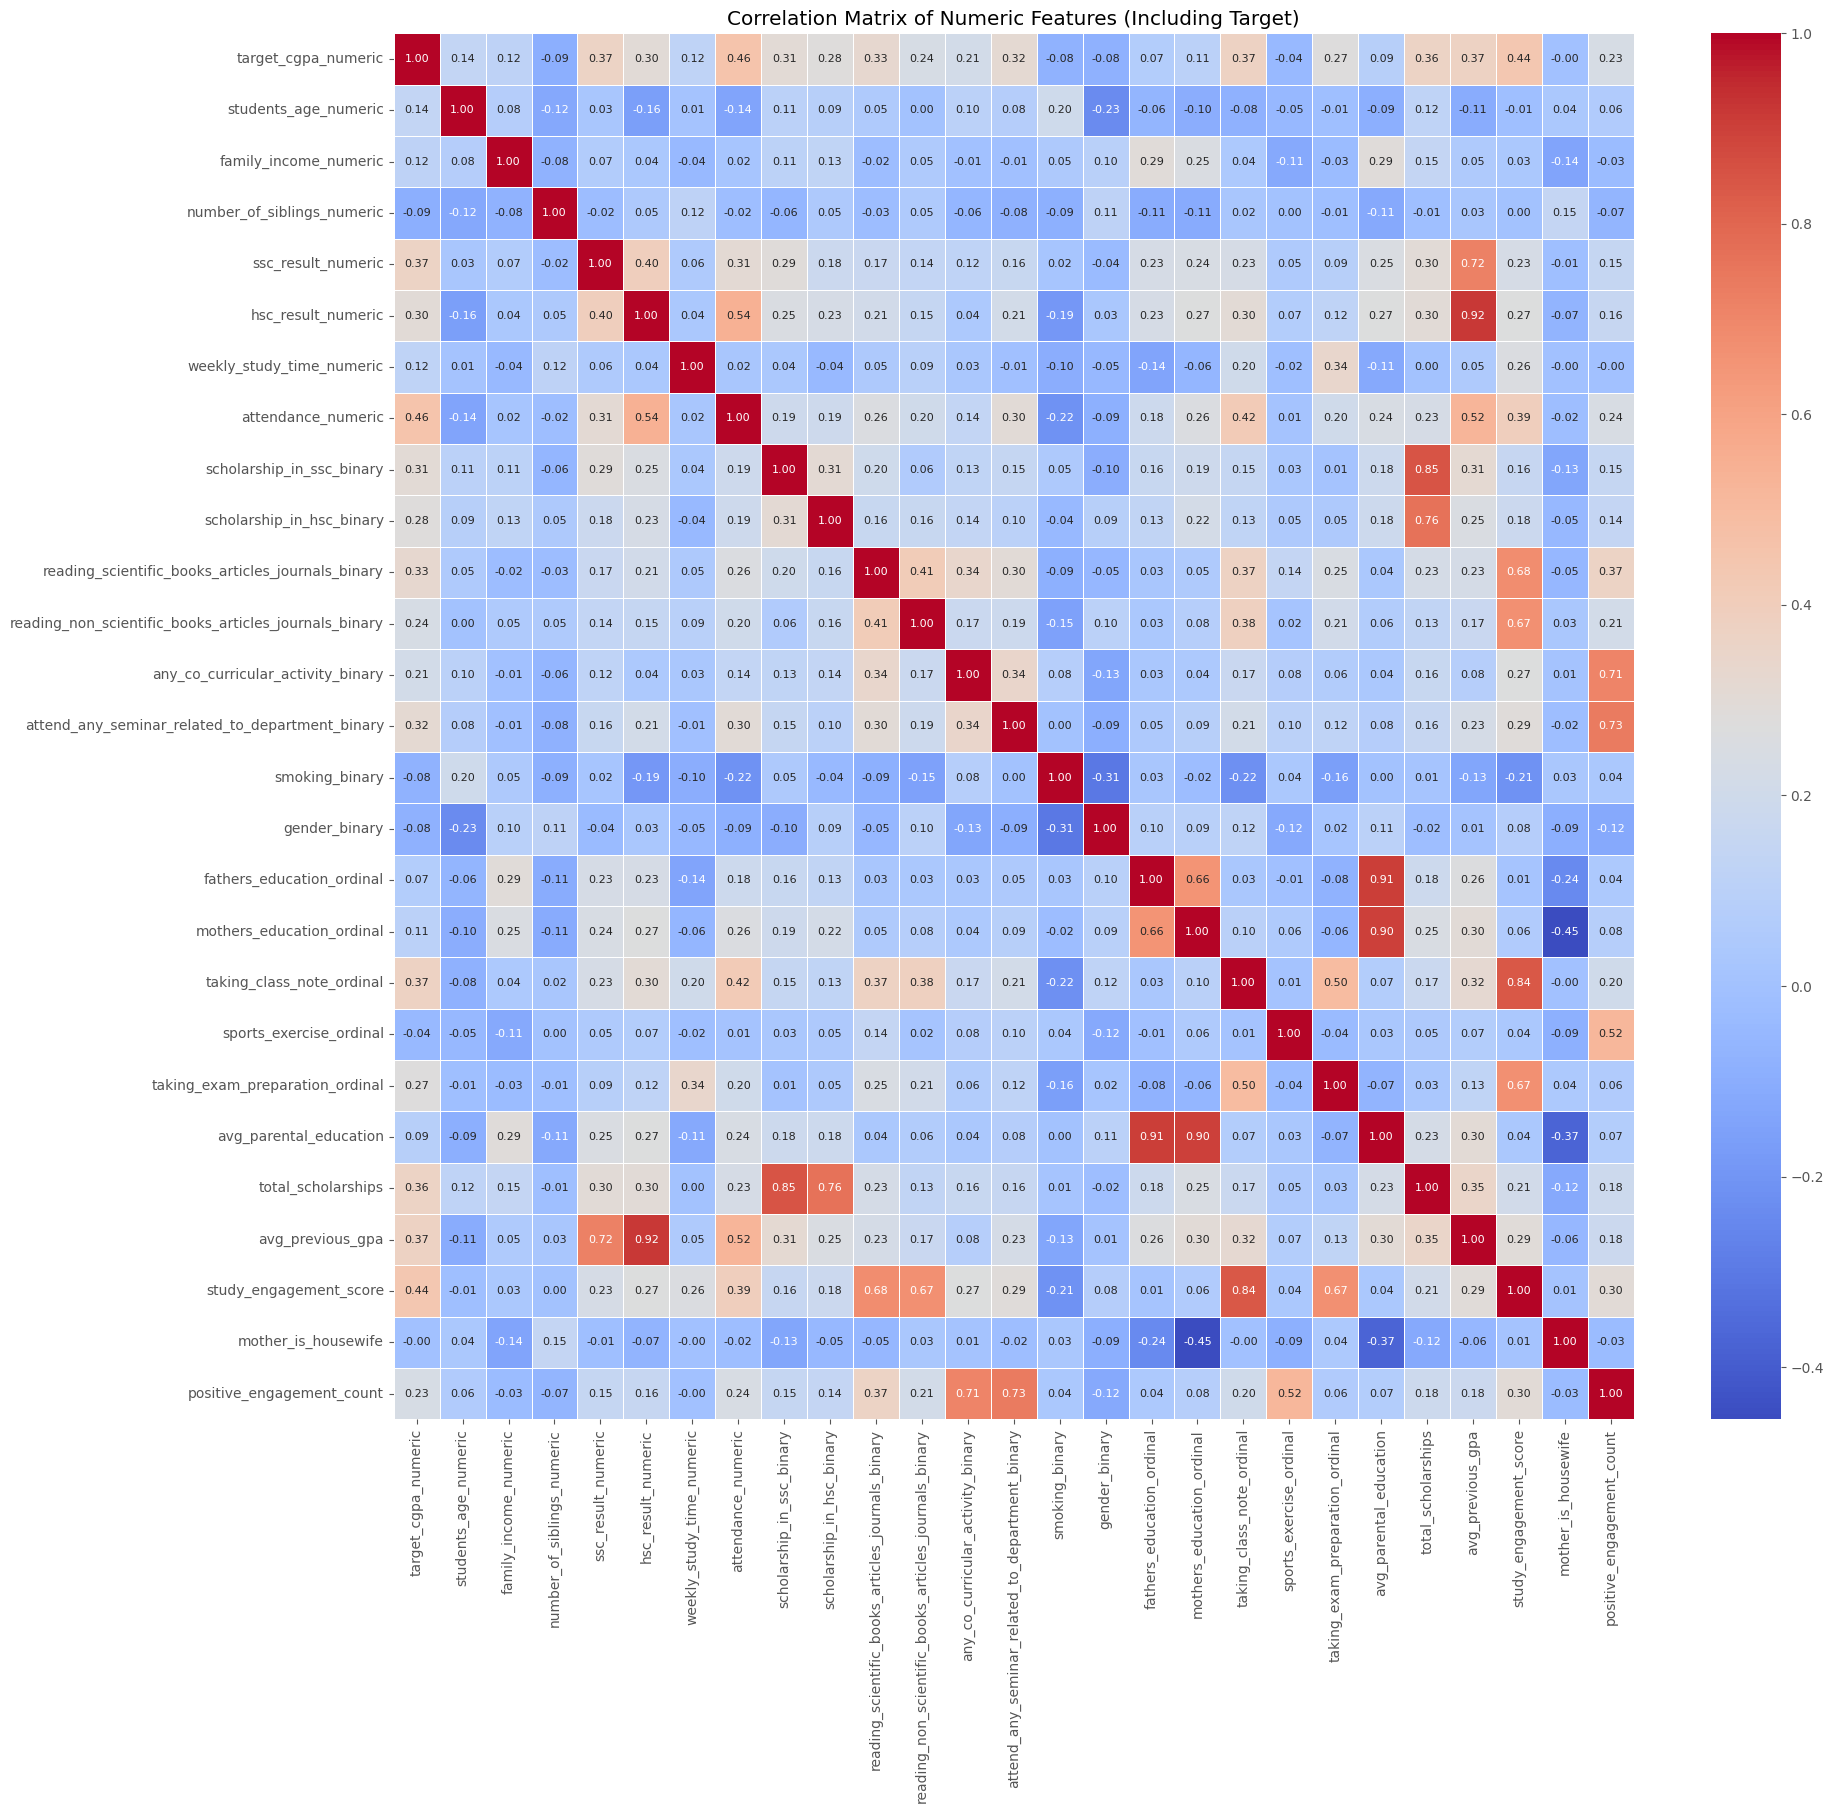


Correlations with Target Variable (target_cgpa_numeric):
target_cgpa_numeric                                      1.000000
attendance_numeric                                       0.457423
study_engagement_score                                   0.438473
taking_class_note_ordinal                                0.371832
avg_previous_gpa                                         0.369289
ssc_result_numeric                                       0.365418
total_scholarships                                       0.364261
reading_scientific_books_articles_journals_binary        0.328062
attend_any_seminar_related_to_department_binary          0.315751
scholarship_in_ssc_binary                                0.306055
hsc_result_numeric                                       0.299183
scholarship_in_hsc_binary                                0.283368
taking_exam_preparation_ordinal                          0.272948
reading_non_scientific_books_articles_journals_binary    0.235081
positive_engagemen

In [11]:
# Select numeric columns for correlation
# Include processed numeric, ordinal, binary, and engineered features
eda_numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Optional: remove sparsely filled columns or columns with low variance
# For this example, we'll proceed with all numeric columns found
# A common practice is to also remove ID-like columns if any were numeric

if eda_numeric_cols and 'target_cgpa_numeric' in eda_numeric_cols:
    # Ensure target is present for meaningful correlation with it
    plt.figure(figsize=(20, 18)) # Adjusted size for more features
    # Calculate correlation matrix for existing columns only
    correlation_matrix = df[eda_numeric_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
    plt.title('Correlation Matrix of Numeric Features (Including Target)')
    plt.show()

    print("\nCorrelations with Target Variable (target_cgpa_numeric):")
    if not correlation_matrix.empty and 'target_cgpa_numeric' in correlation_matrix:
        print(correlation_matrix['target_cgpa_numeric'].sort_values(ascending=False))
    else:
        print("Could not compute correlations or target_cgpa_numeric not in matrix.")
else:
    print("No numeric columns available for correlation heatmap, or target not found.")

C:\Users\Shubh\AppData\Local\Temp\ipykernel_5880\2735267914.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='target_cgpa_numeric', data=df, palette='viridis')


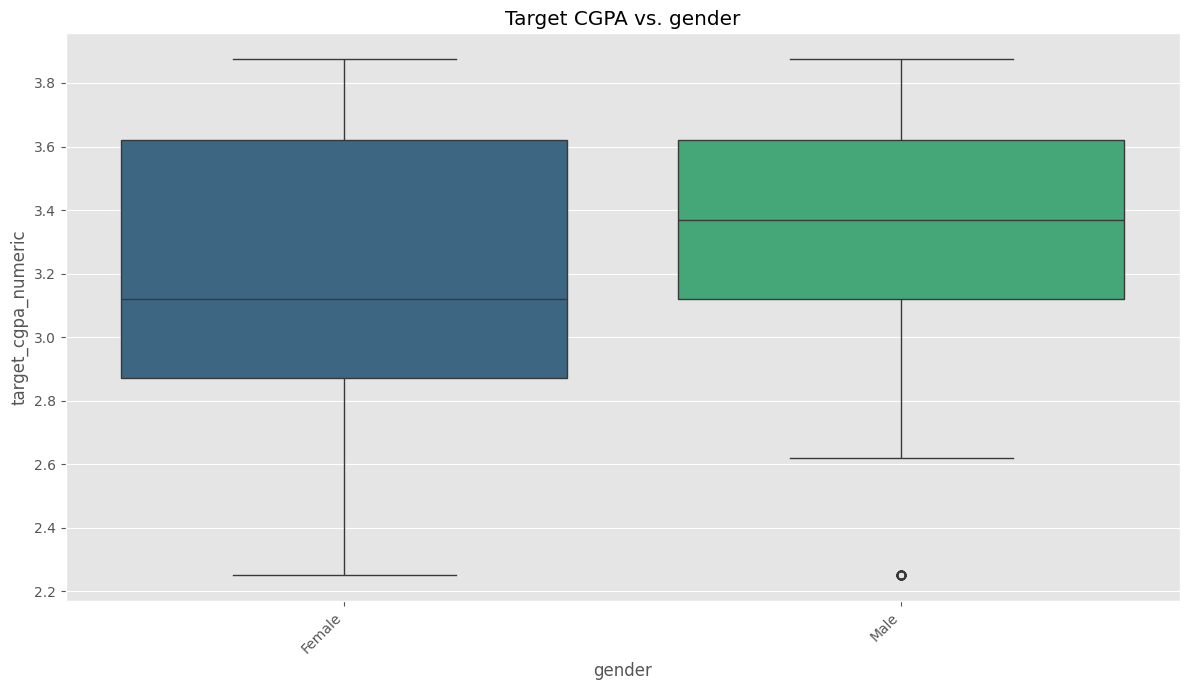

C:\Users\Shubh\AppData\Local\Temp\ipykernel_5880\2735267914.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='target_cgpa_numeric', data=df, palette='viridis')


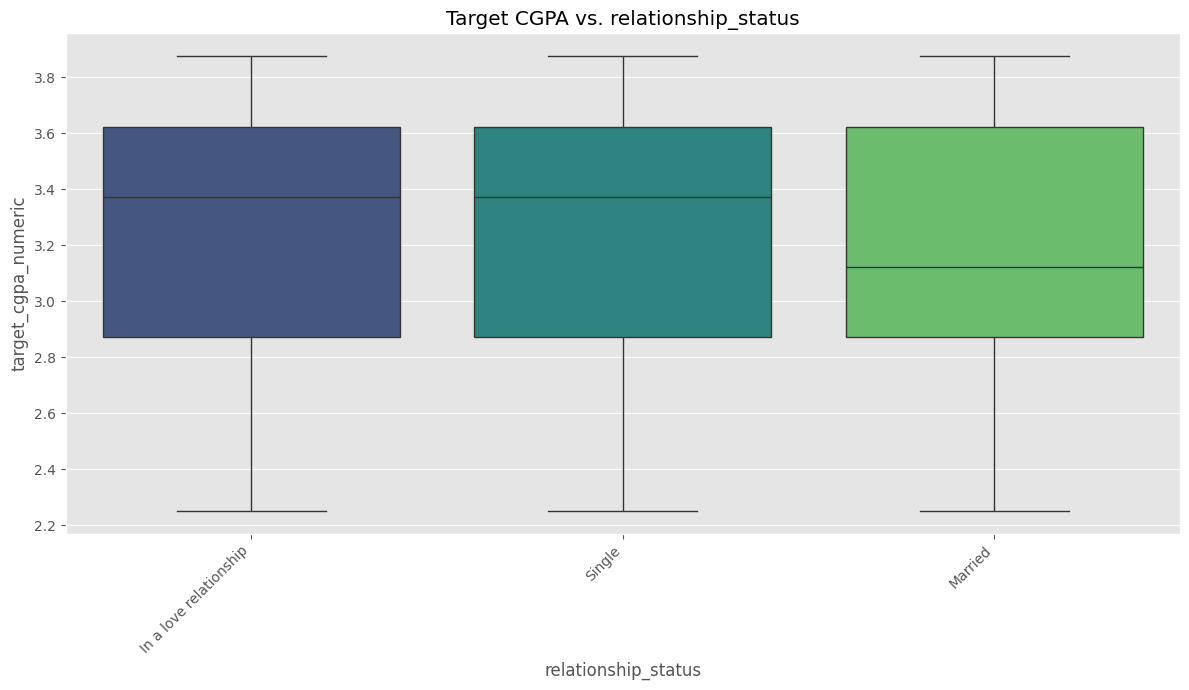

C:\Users\Shubh\AppData\Local\Temp\ipykernel_5880\2735267914.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='target_cgpa_numeric', data=df, palette='viridis')


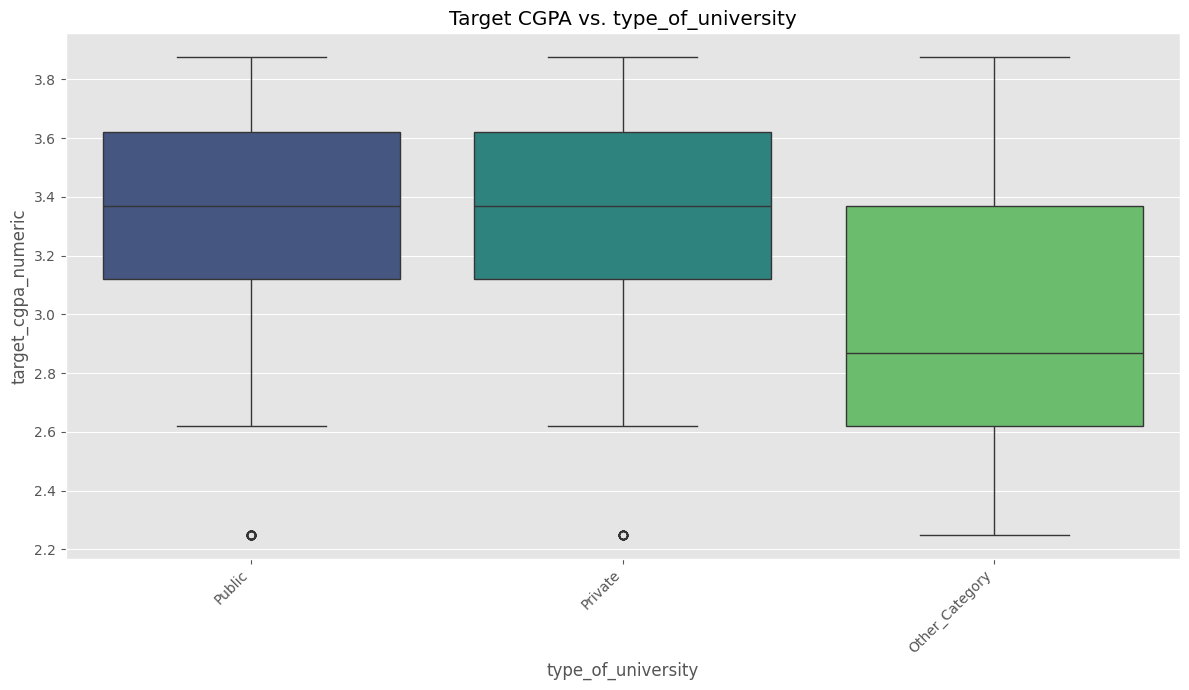

C:\Users\Shubh\AppData\Local\Temp\ipykernel_5880\2735267914.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='target_cgpa_numeric', data=df, palette='viridis')


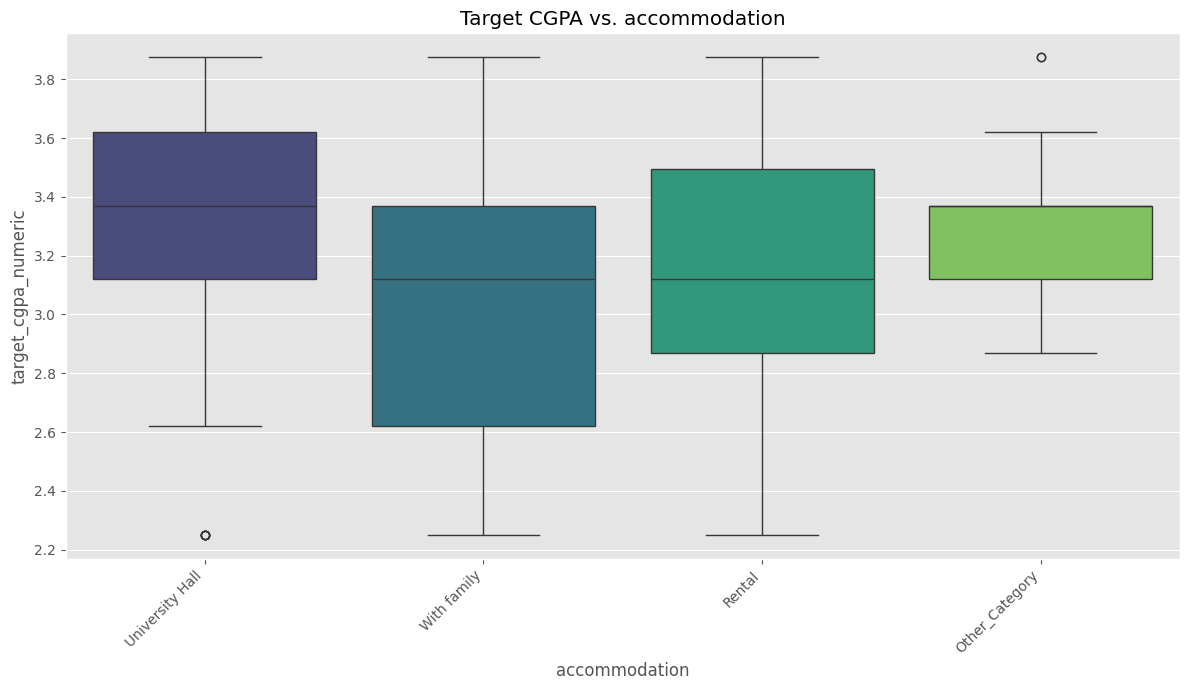

C:\Users\Shubh\AppData\Local\Temp\ipykernel_5880\2735267914.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='target_cgpa_numeric', data=df, palette='viridis')


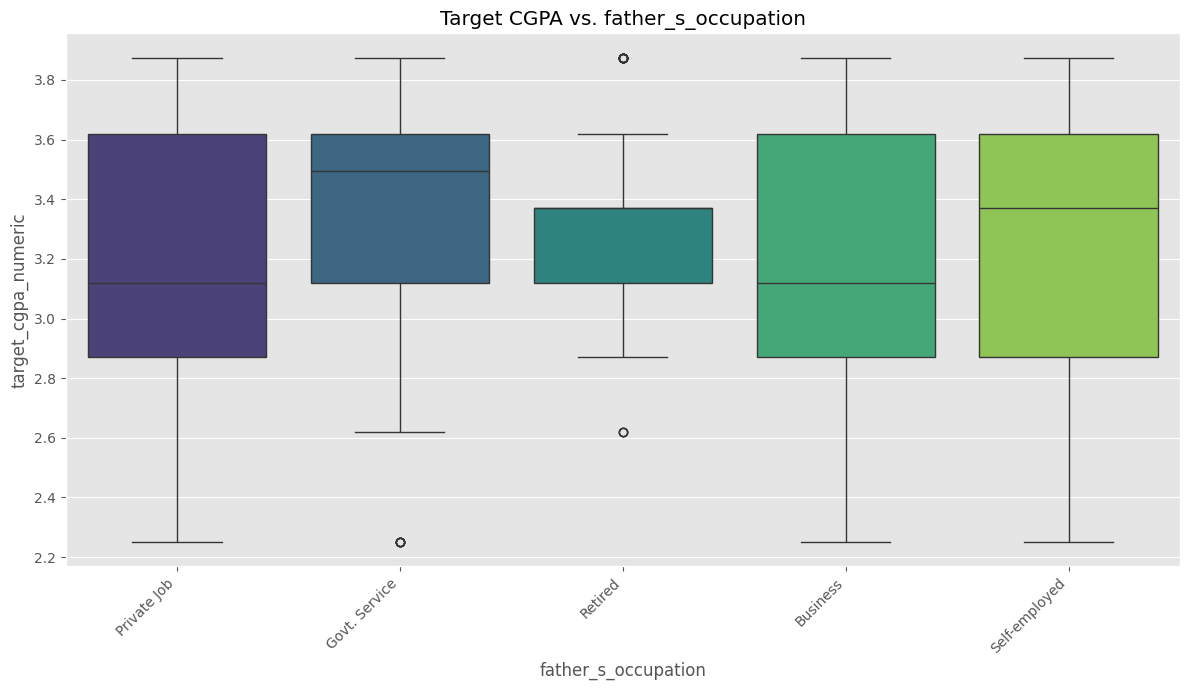

C:\Users\Shubh\AppData\Local\Temp\ipykernel_5880\2735267914.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='target_cgpa_numeric', data=df, palette='viridis')


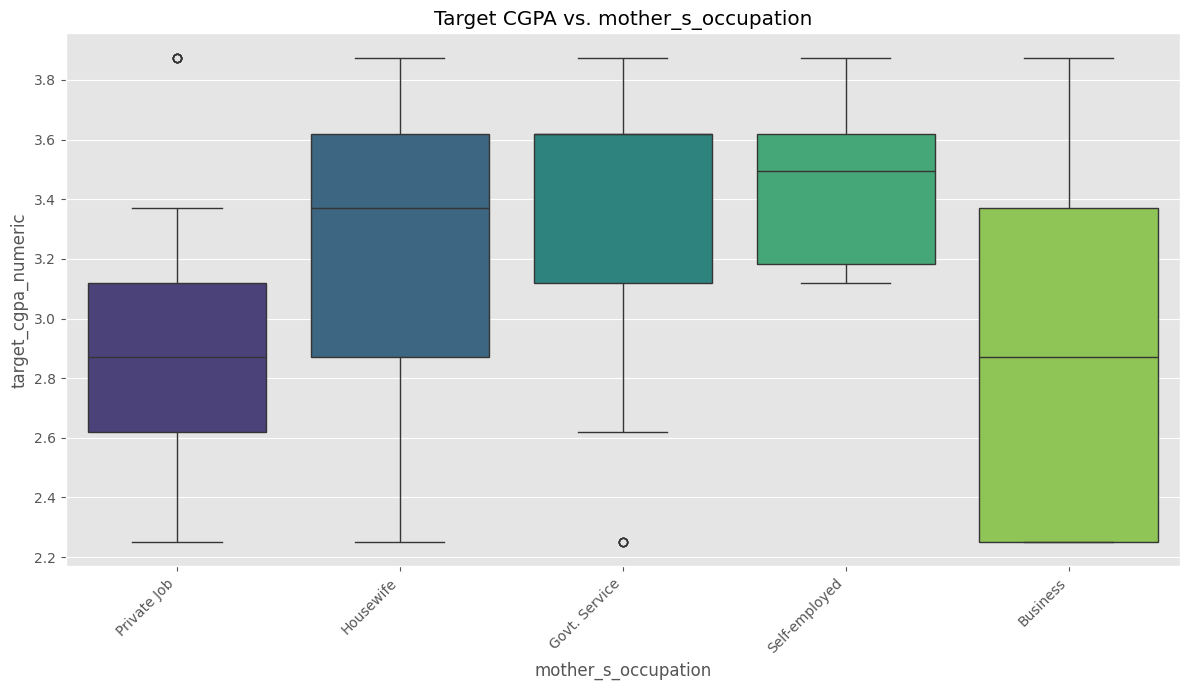

C:\Users\Shubh\AppData\Local\Temp\ipykernel_5880\2735267914.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='target_cgpa_numeric', data=df, palette='viridis')


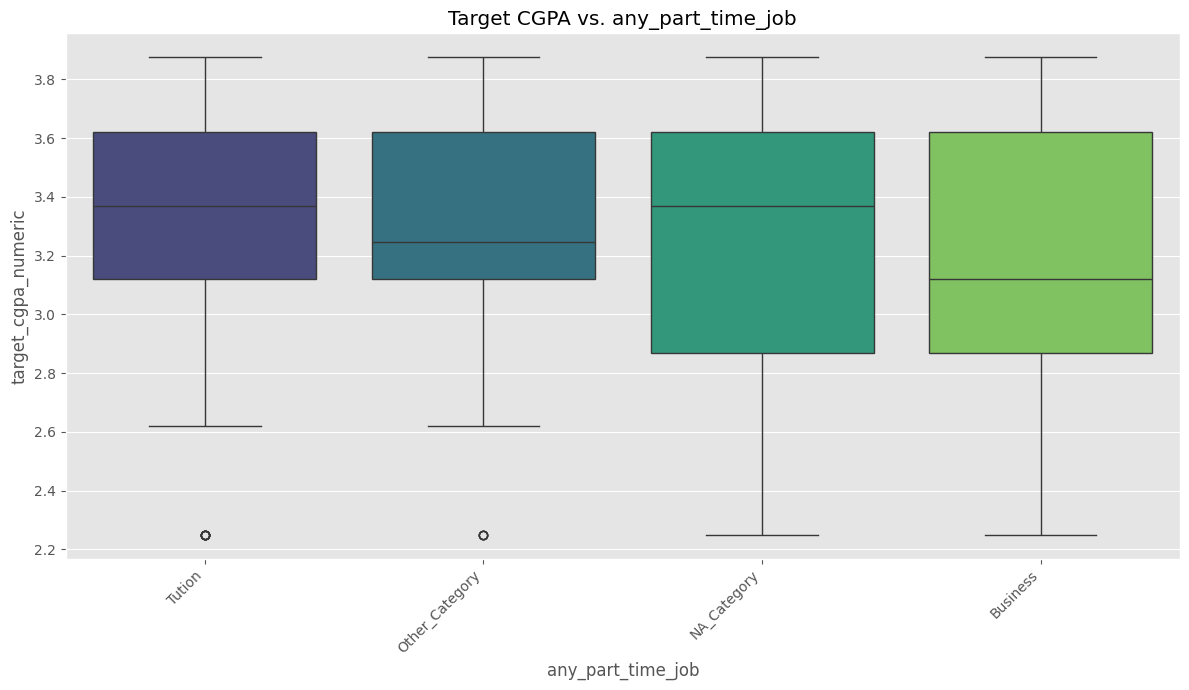

C:\Users\Shubh\AppData\Local\Temp\ipykernel_5880\2735267914.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='target_cgpa_numeric', data=df, palette='viridis')


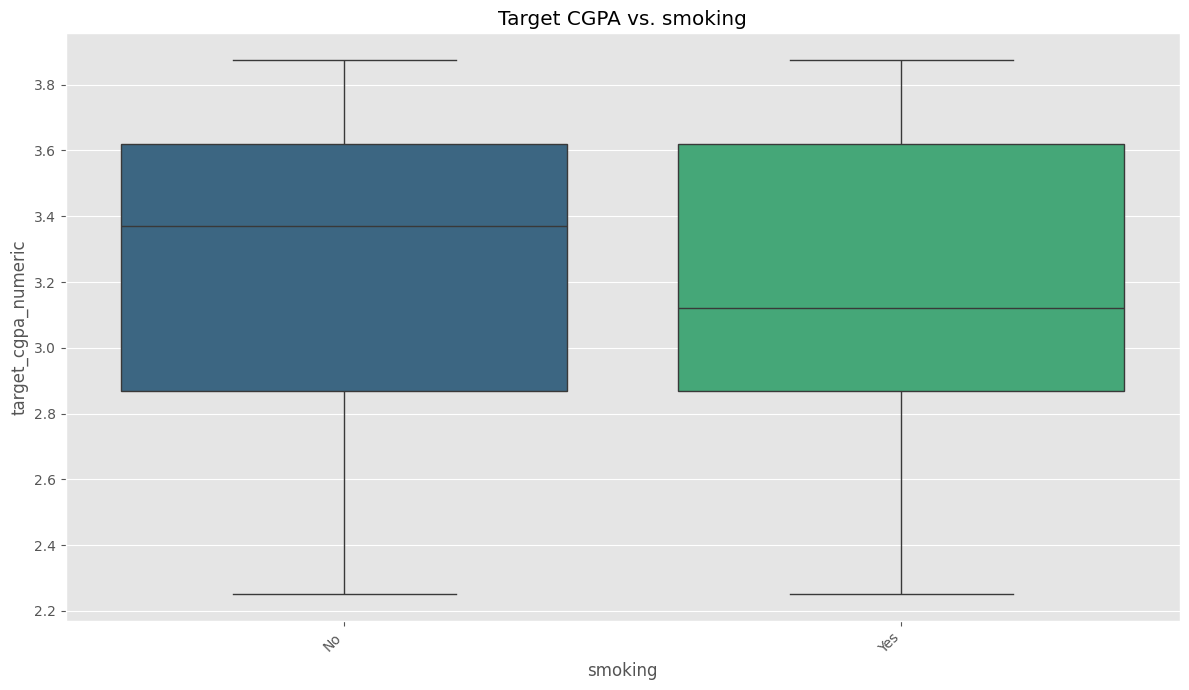

C:\Users\Shubh\AppData\Local\Temp\ipykernel_5880\2735267914.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='target_cgpa_numeric', data=df, palette='viridis')


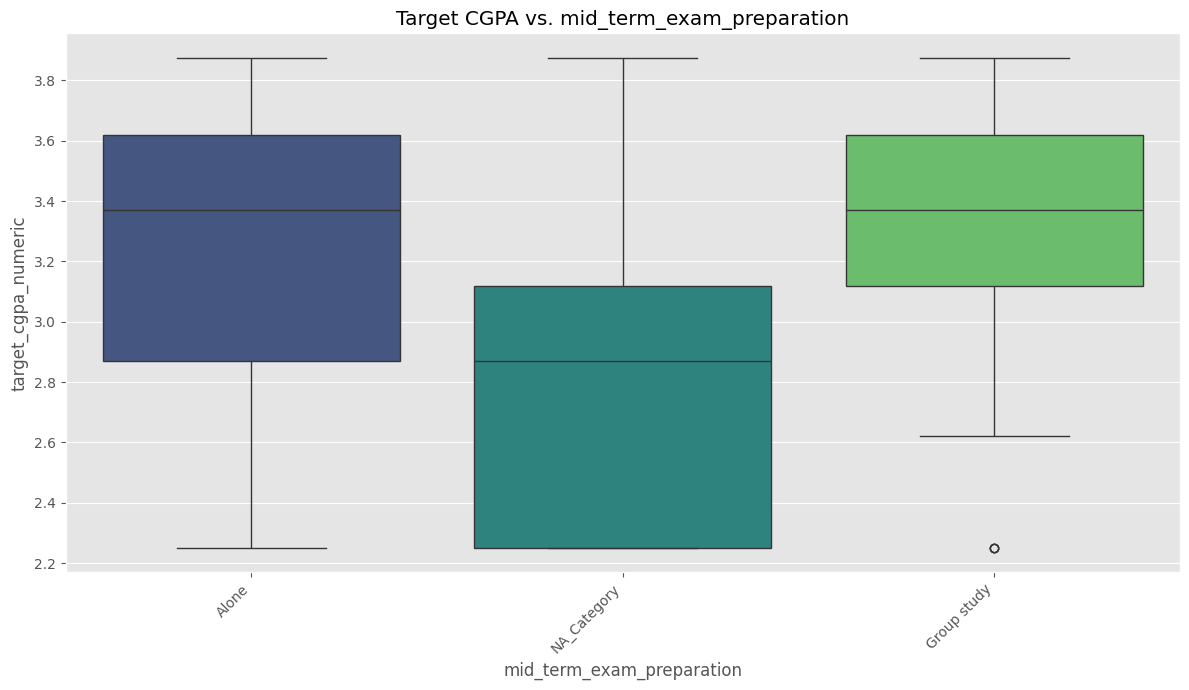

C:\Users\Shubh\AppData\Local\Temp\ipykernel_5880\2735267914.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='target_cgpa_numeric', data=df, palette='viridis')


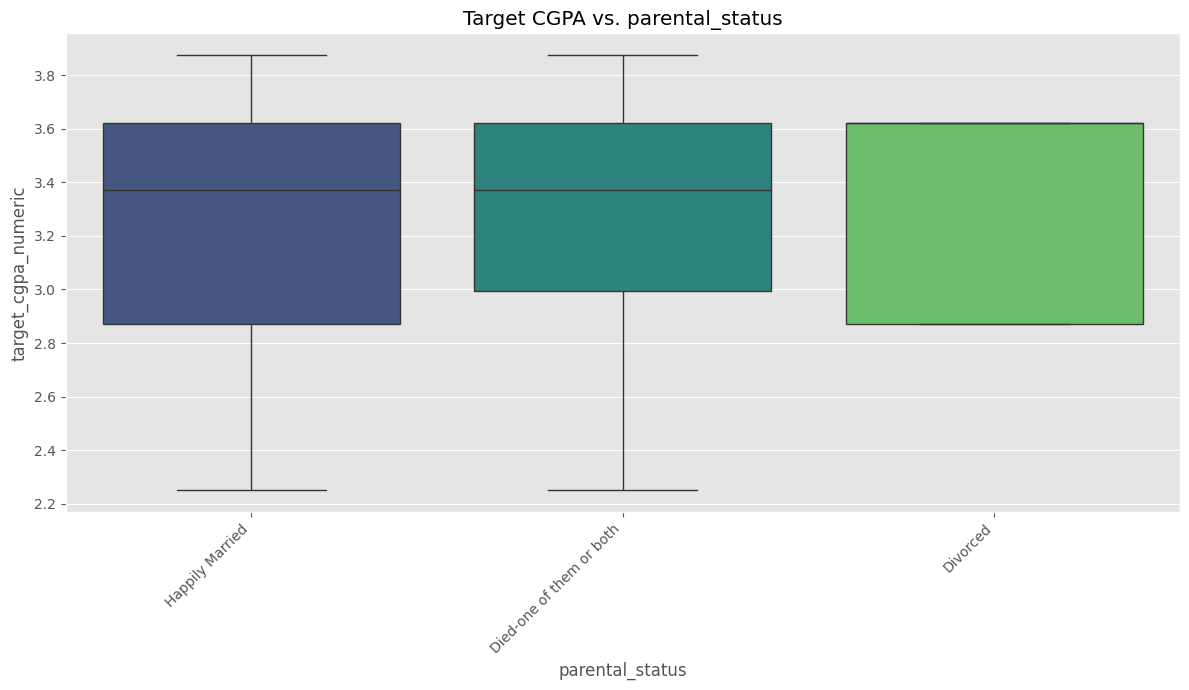

C:\Users\Shubh\AppData\Local\Temp\ipykernel_5880\2735267914.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='target_cgpa_numeric', data=df, palette='viridis')


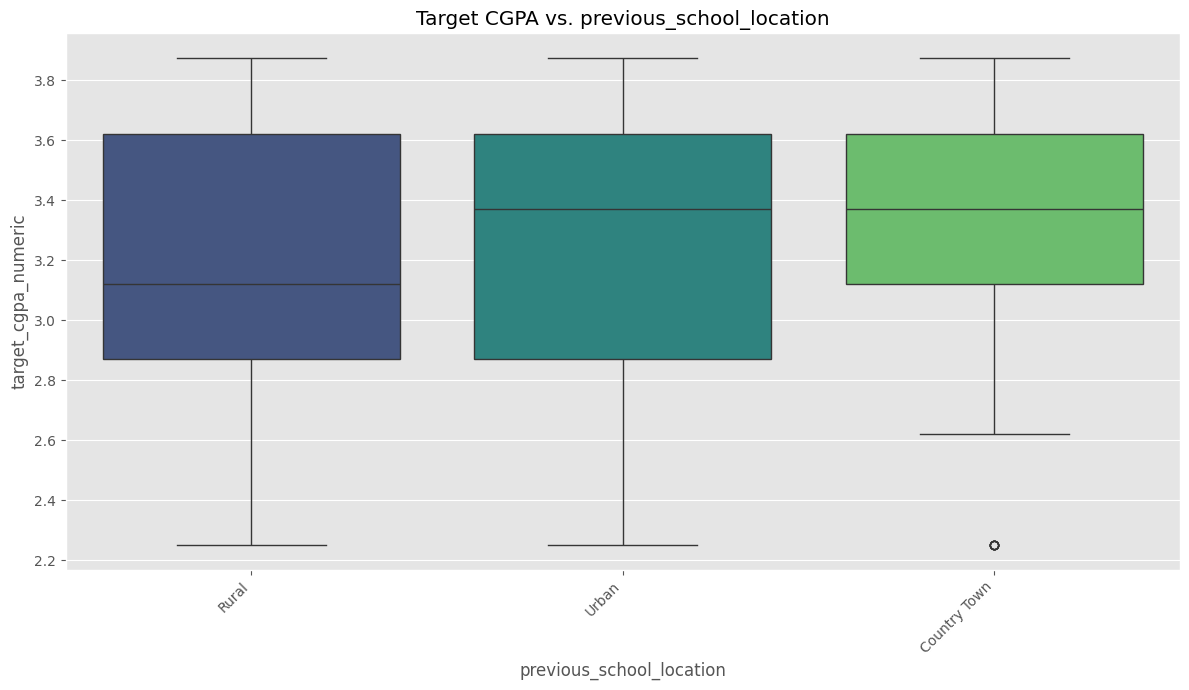

C:\Users\Shubh\AppData\Local\Temp\ipykernel_5880\2735267914.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='target_cgpa_numeric', data=df, palette='viridis')


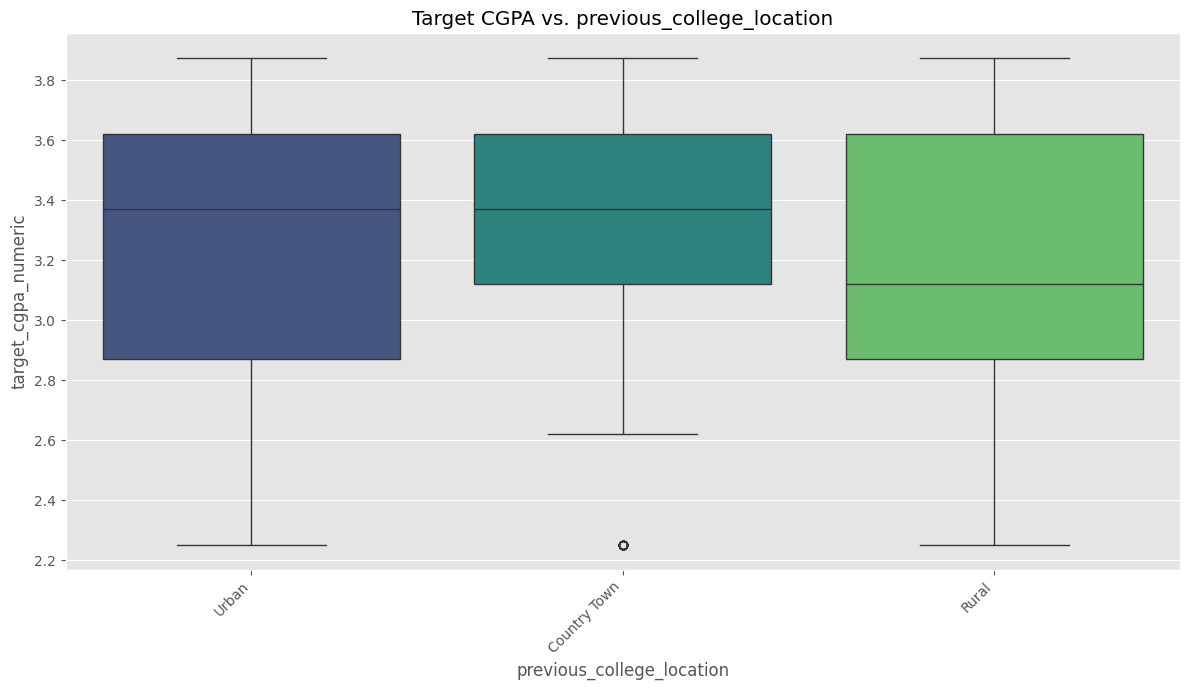

In [12]:
categorical_cols_for_eda = [
    'gender', 'relationship_status', 'type_of_university', 'accommodation',
    'father_s_occupation', 'mother_s_occupation', # Might have many unique values
    'any_part_time_job', 'smoking', 'mid_term_exam_preparation', 'parental_status',
    'previous_school_location', 'previous_college_location'
]

if 'target_cgpa_numeric' in df.columns and not df['target_cgpa_numeric'].isnull().all():
    for col in categorical_cols_for_eda:
        if col in df.columns:
            if df[col].nunique() < 20 and df[col].nunique() > 1: # Plot if not too many unique categories and more than 1
                plt.figure(figsize=(12, 7))
                sns.boxplot(x=col, y='target_cgpa_numeric', data=df, palette='viridis')
                plt.title(f'Target CGPA vs. {col}')
                plt.xticks(rotation=45, ha='right')
                plt.tight_layout()
                plt.show()
            elif df[col].nunique() >= 20:
                print(f"Skipping boxplot for '{col}' (categorical) due to high cardinality ({df[col].nunique()}). Consider grouping or other viz.")
        else:
            print(f"Column '{col}' not found for EDA.")
else:
    print("Target variable 'target_cgpa_numeric' not available for categorical EDA.")

C:\Users\Shubh\AppData\Local\Temp\ipykernel_5880\3474915257.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='target_cgpa_numeric', data=df, palette='magma')


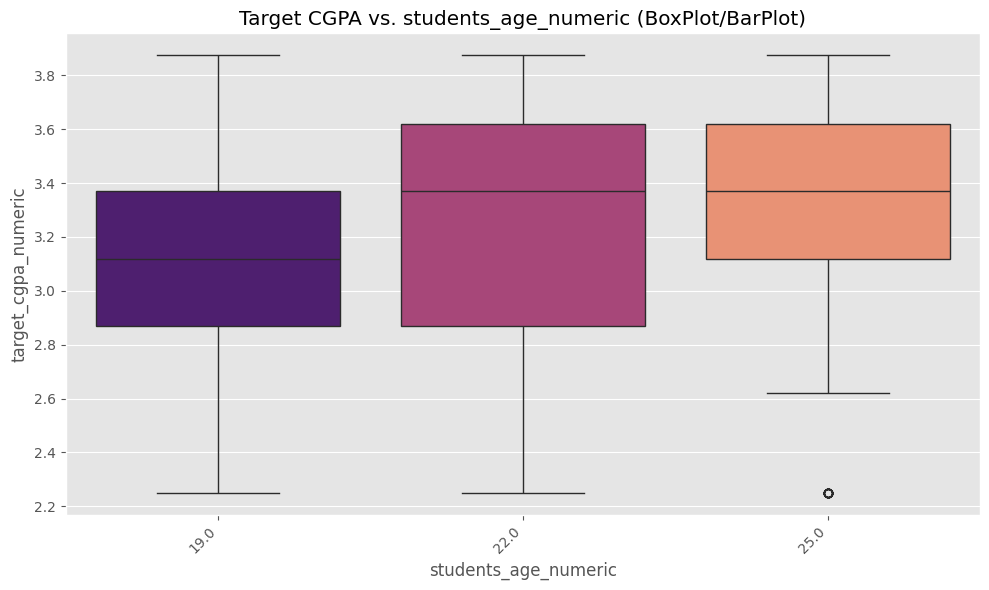

C:\Users\Shubh\AppData\Local\Temp\ipykernel_5880\3474915257.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='target_cgpa_numeric', data=df, palette='magma')


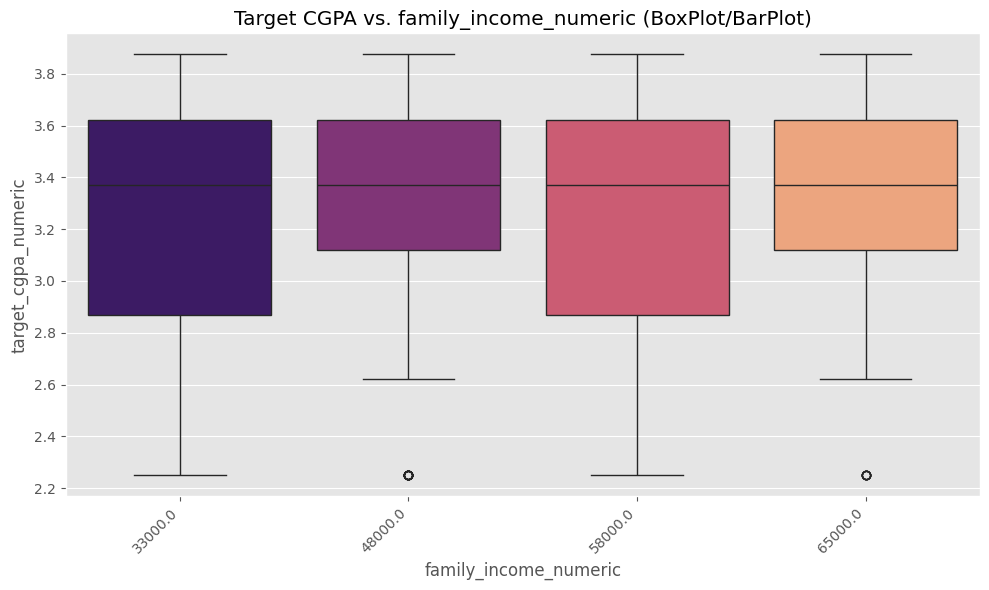

C:\Users\Shubh\AppData\Local\Temp\ipykernel_5880\3474915257.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='target_cgpa_numeric', data=df, palette='magma')


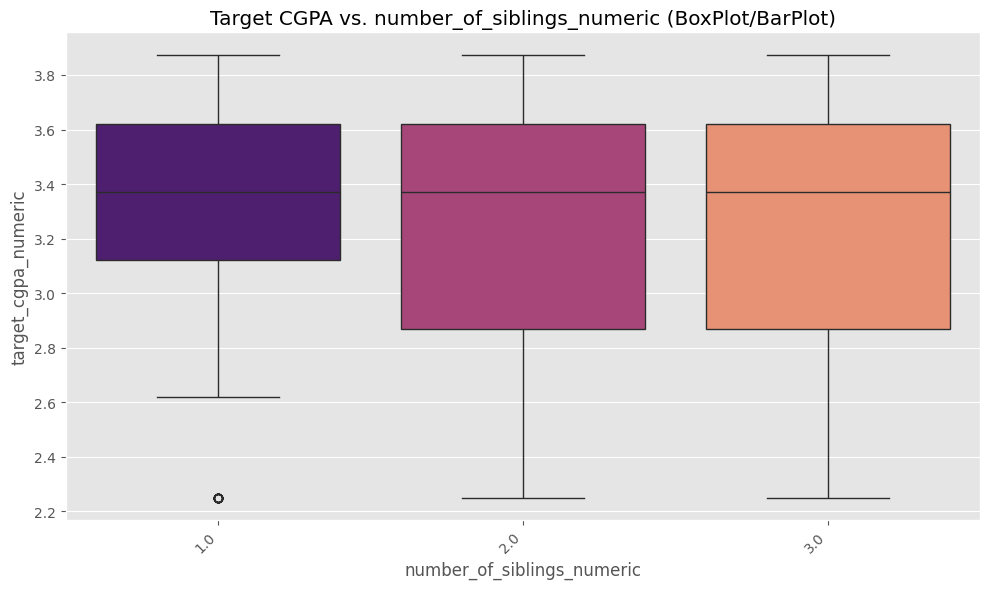

C:\Users\Shubh\AppData\Local\Temp\ipykernel_5880\3474915257.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='target_cgpa_numeric', data=df, palette='magma')


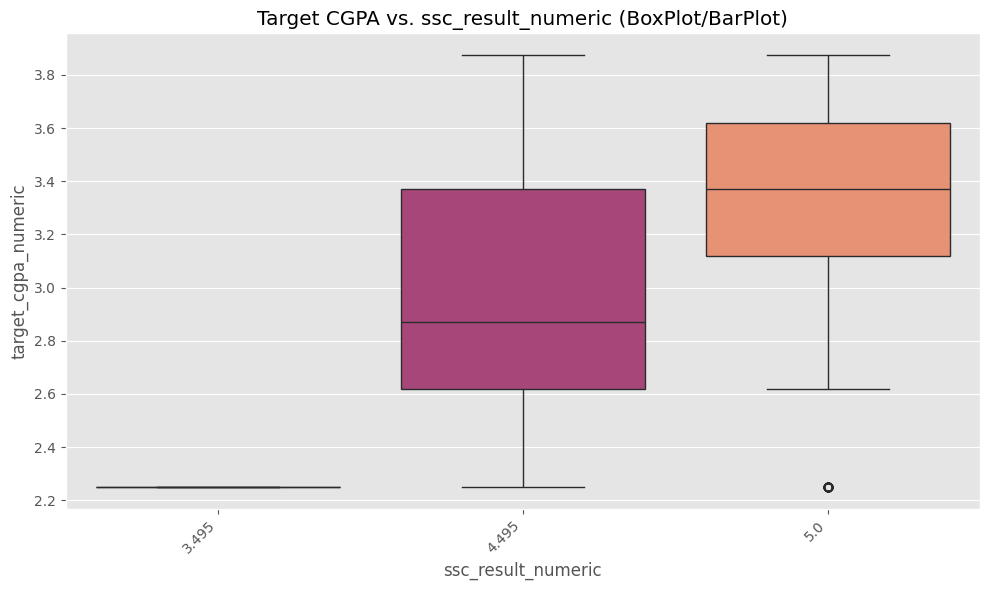

C:\Users\Shubh\AppData\Local\Temp\ipykernel_5880\3474915257.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='target_cgpa_numeric', data=df, palette='magma')


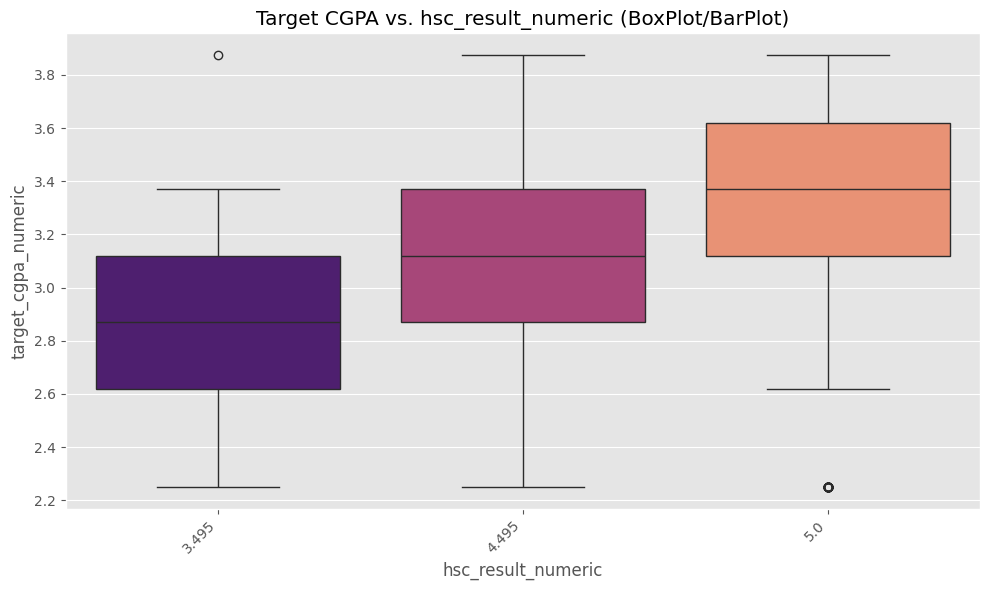

C:\Users\Shubh\AppData\Local\Temp\ipykernel_5880\3474915257.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='target_cgpa_numeric', data=df, palette='magma')


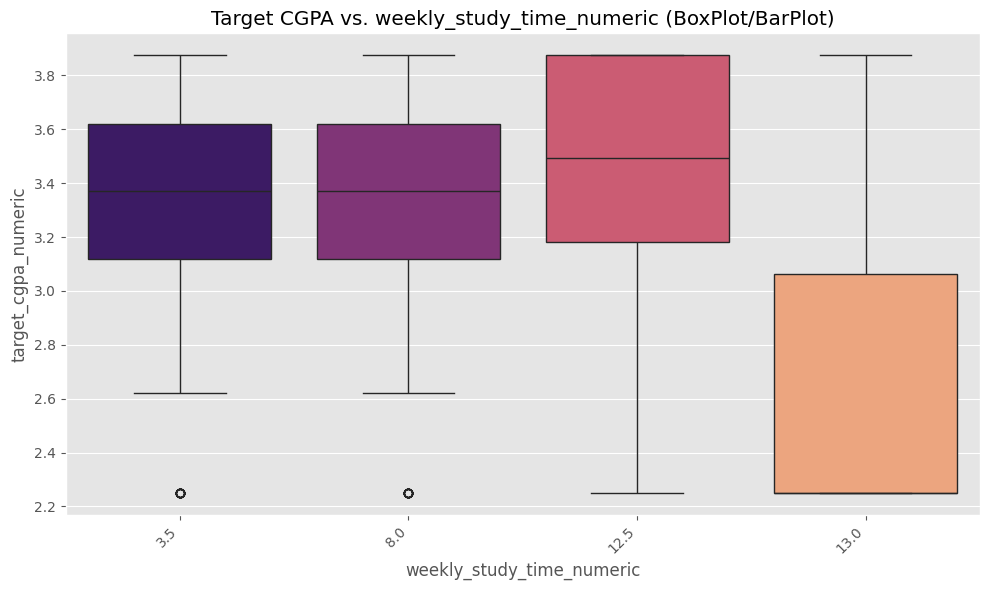

C:\Users\Shubh\AppData\Local\Temp\ipykernel_5880\3474915257.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='target_cgpa_numeric', data=df, palette='magma')


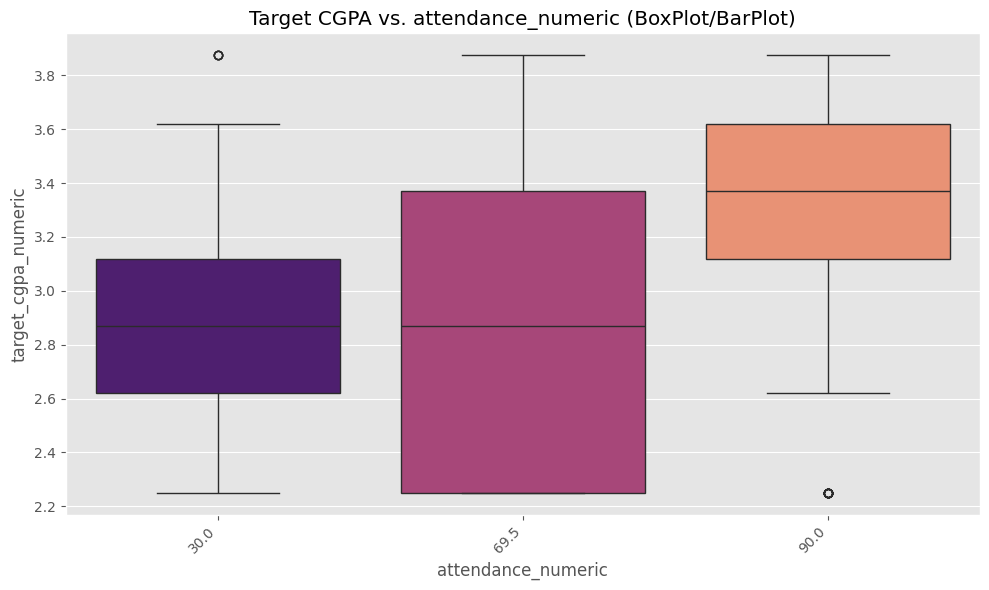

C:\Users\Shubh\AppData\Local\Temp\ipykernel_5880\3474915257.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='target_cgpa_numeric', data=df, palette='magma')


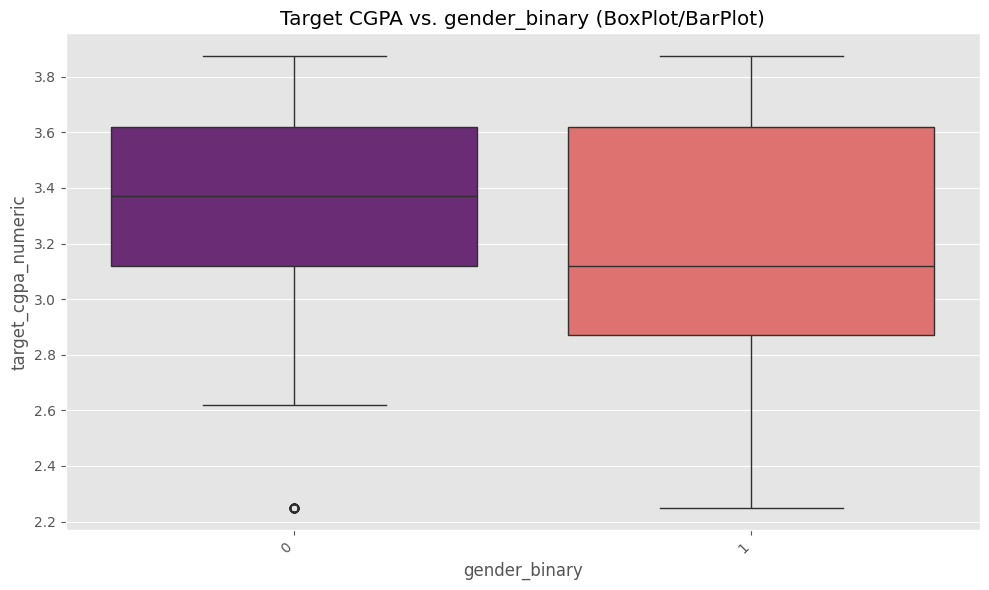

C:\Users\Shubh\AppData\Local\Temp\ipykernel_5880\3474915257.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='target_cgpa_numeric', data=df, palette='magma')


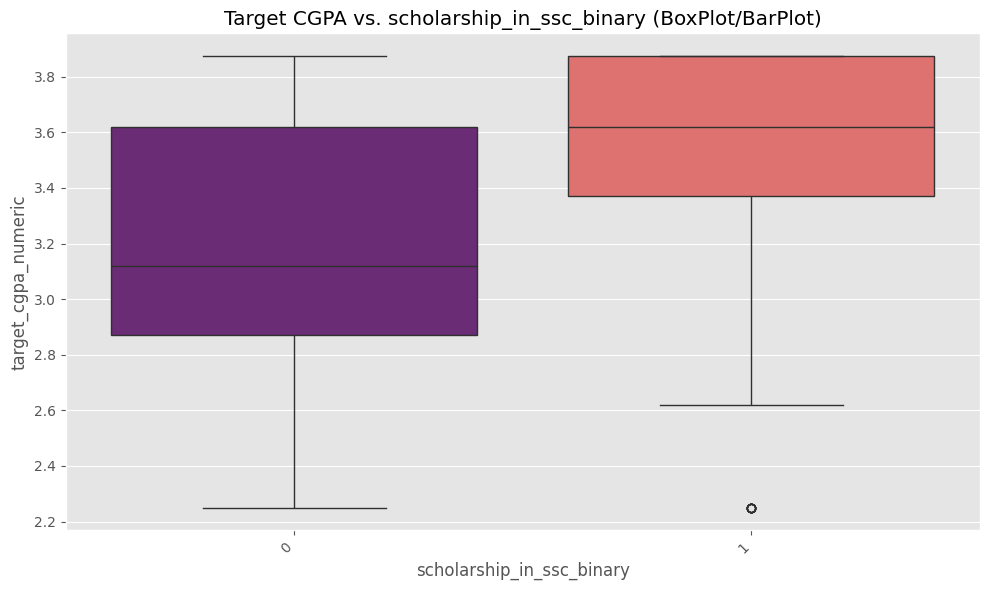

C:\Users\Shubh\AppData\Local\Temp\ipykernel_5880\3474915257.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='target_cgpa_numeric', data=df, palette='magma')


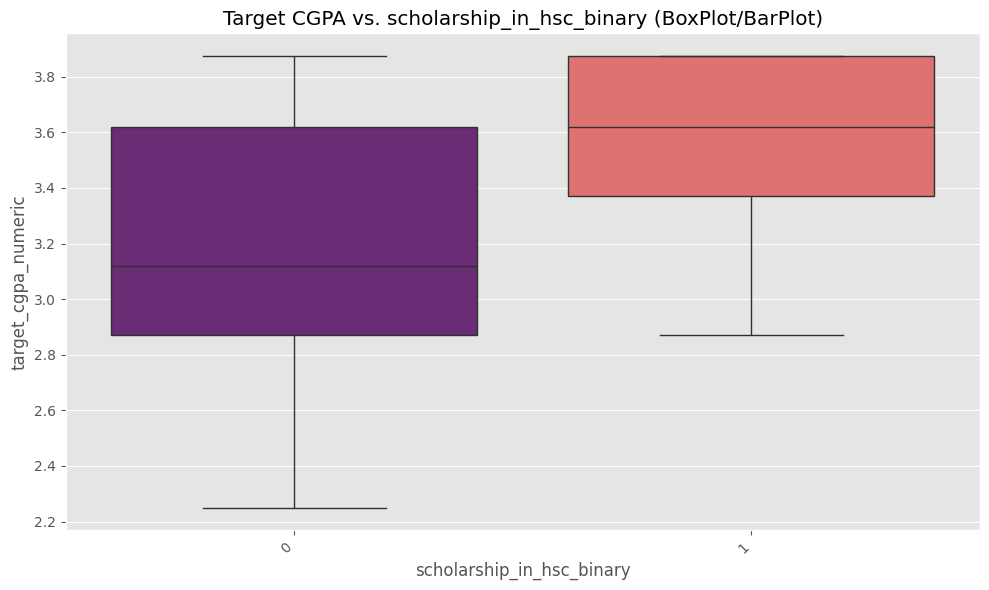

C:\Users\Shubh\AppData\Local\Temp\ipykernel_5880\3474915257.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='target_cgpa_numeric', data=df, palette='magma')


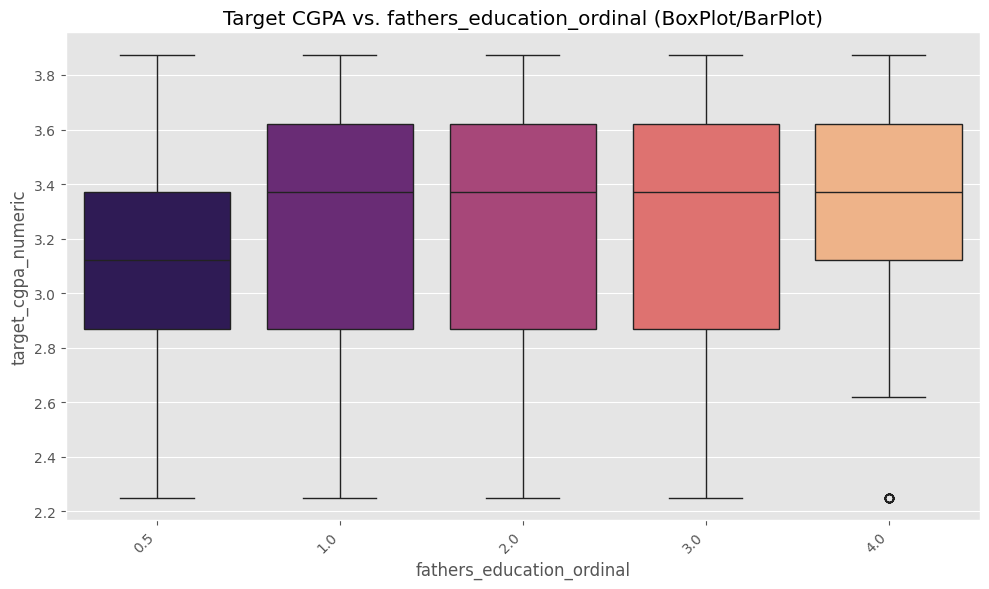

C:\Users\Shubh\AppData\Local\Temp\ipykernel_5880\3474915257.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='target_cgpa_numeric', data=df, palette='magma')


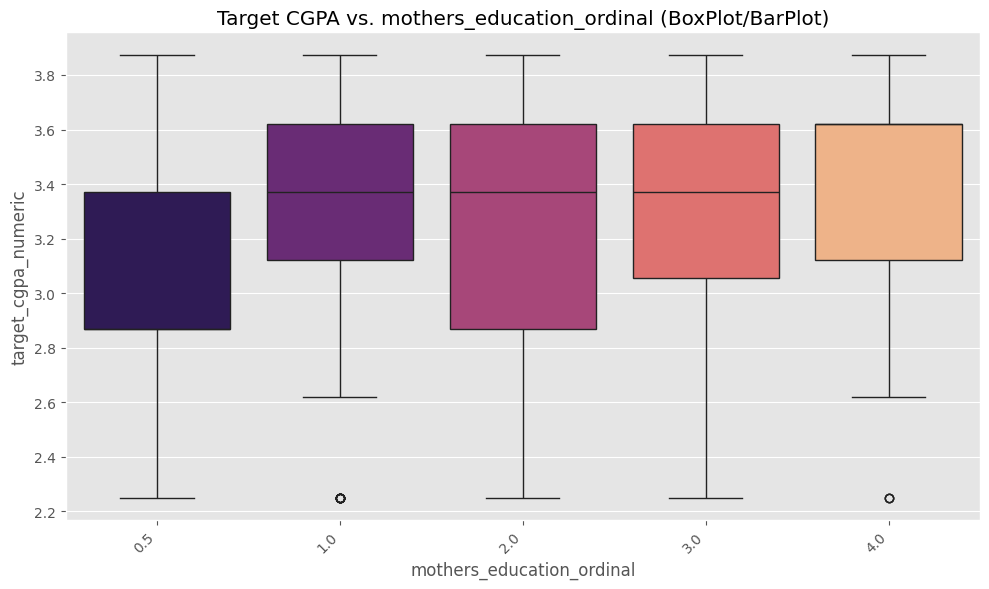

C:\Users\Shubh\AppData\Local\Temp\ipykernel_5880\3474915257.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='target_cgpa_numeric', data=df, palette='magma')


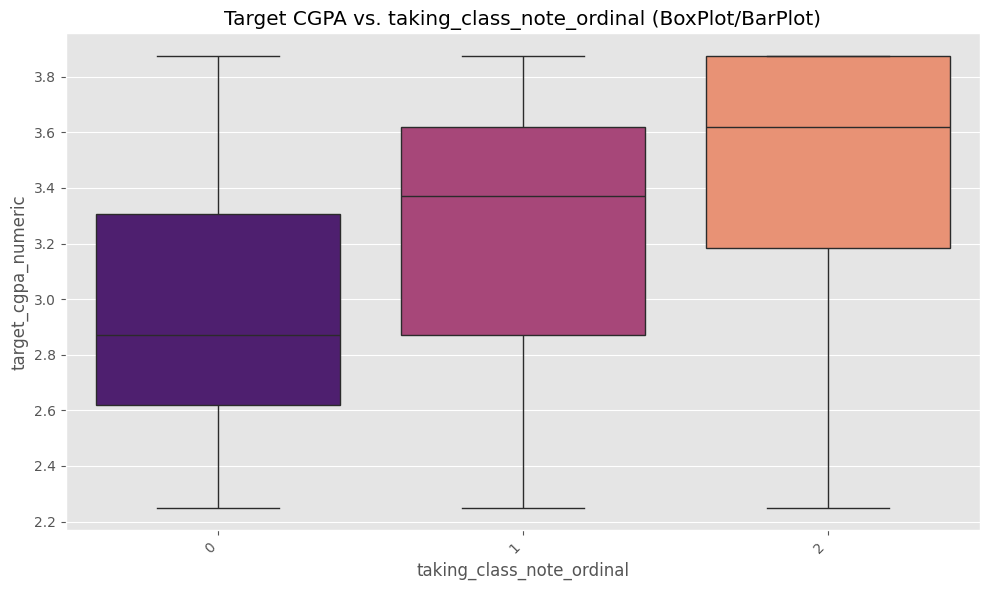

C:\Users\Shubh\AppData\Local\Temp\ipykernel_5880\3474915257.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='target_cgpa_numeric', data=df, palette='magma')


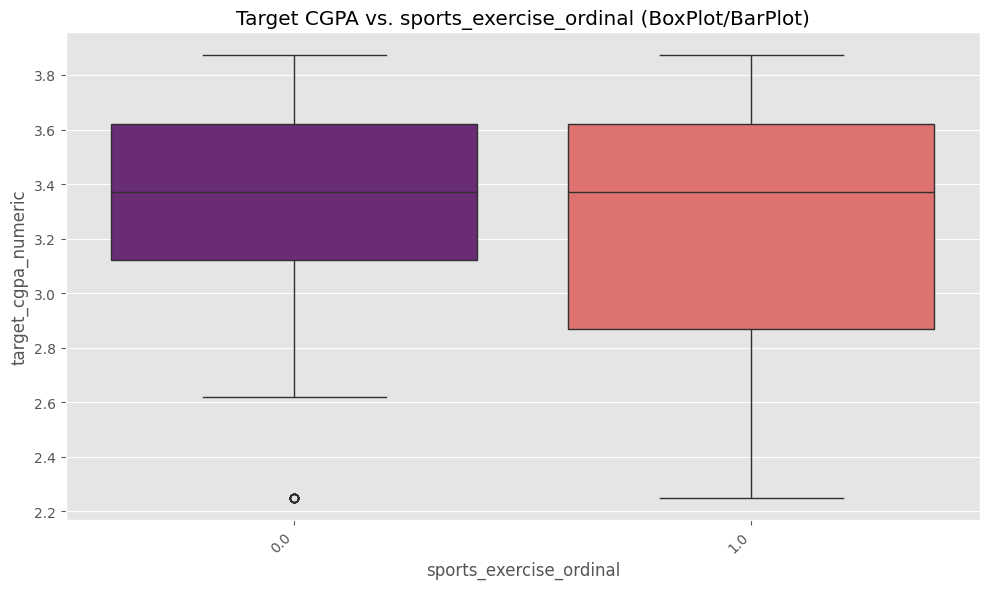

C:\Users\Shubh\AppData\Local\Temp\ipykernel_5880\3474915257.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='target_cgpa_numeric', data=df, palette='magma')


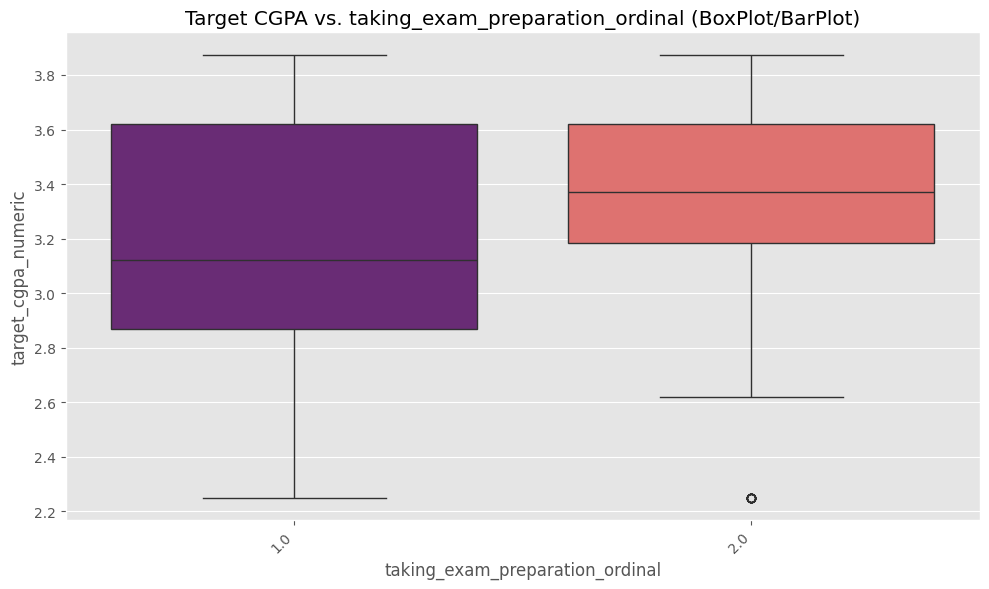

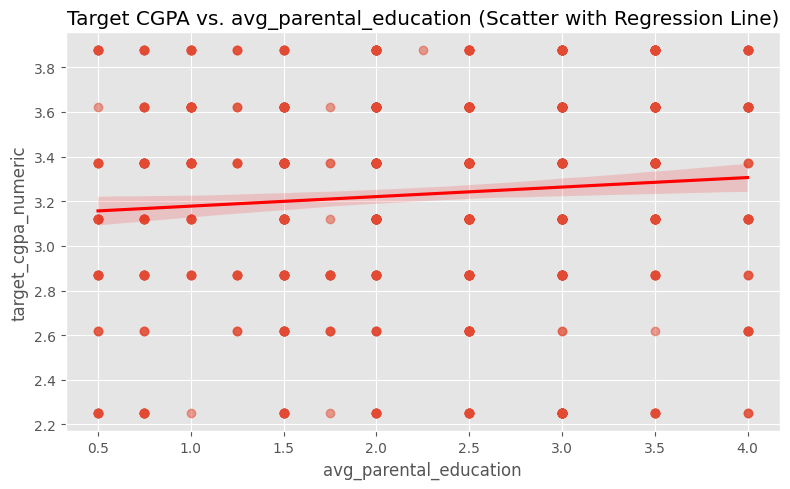

C:\Users\Shubh\AppData\Local\Temp\ipykernel_5880\3474915257.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='target_cgpa_numeric', data=df, palette='magma')


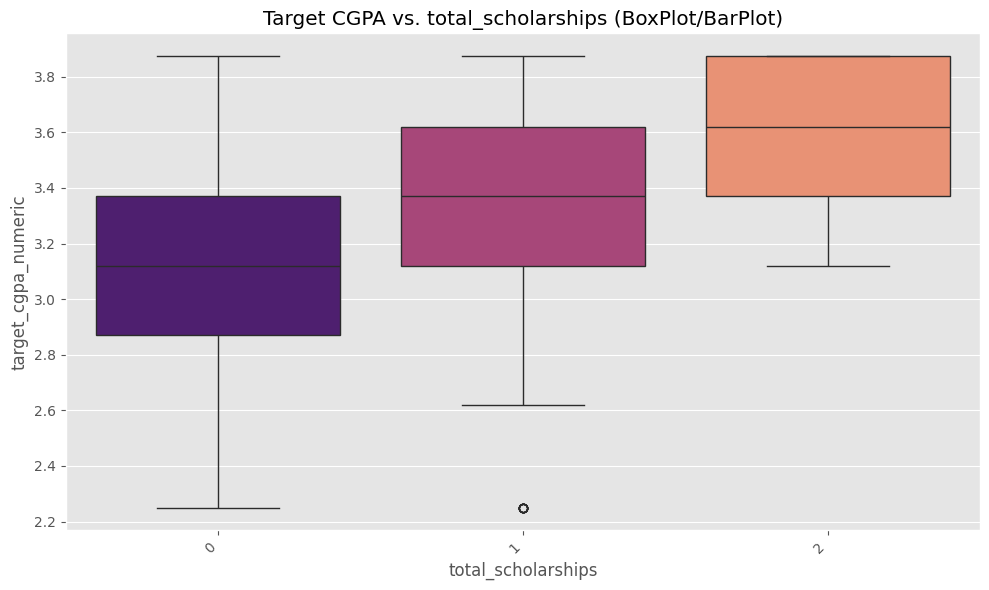

C:\Users\Shubh\AppData\Local\Temp\ipykernel_5880\3474915257.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='target_cgpa_numeric', data=df, palette='magma')


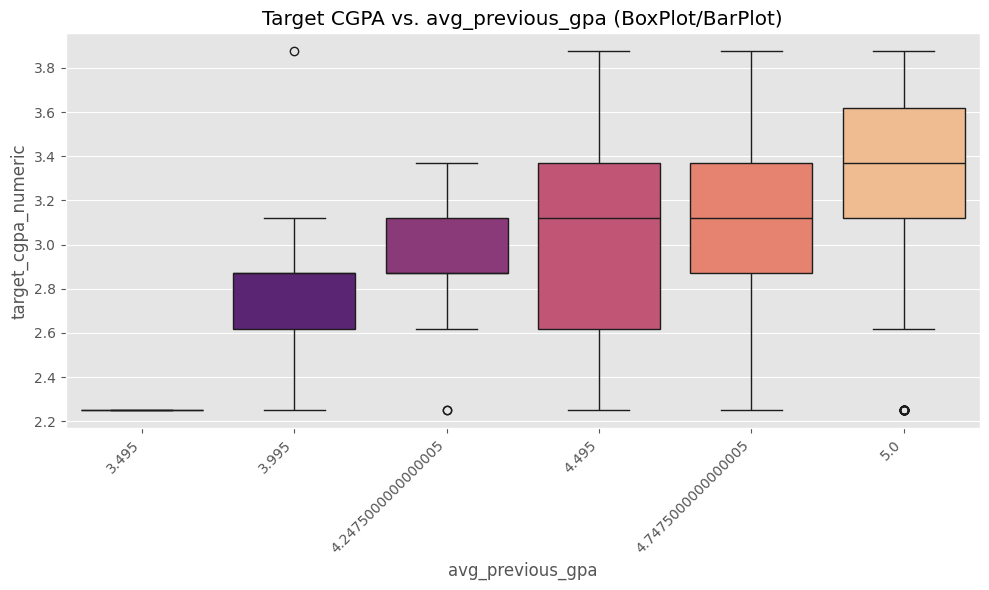

C:\Users\Shubh\AppData\Local\Temp\ipykernel_5880\3474915257.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='target_cgpa_numeric', data=df, palette='magma')


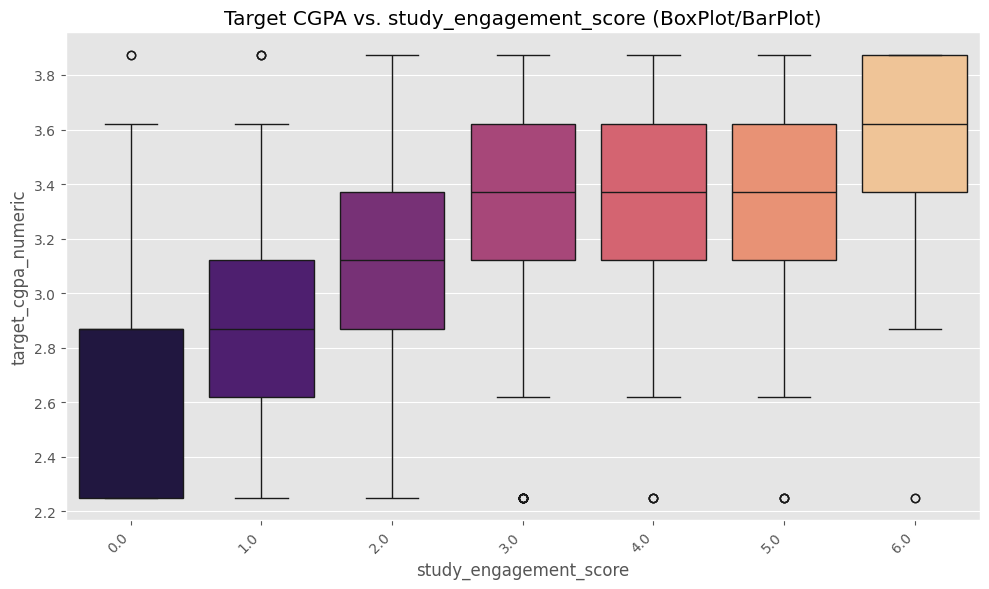

C:\Users\Shubh\AppData\Local\Temp\ipykernel_5880\3474915257.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='target_cgpa_numeric', data=df, palette='magma')


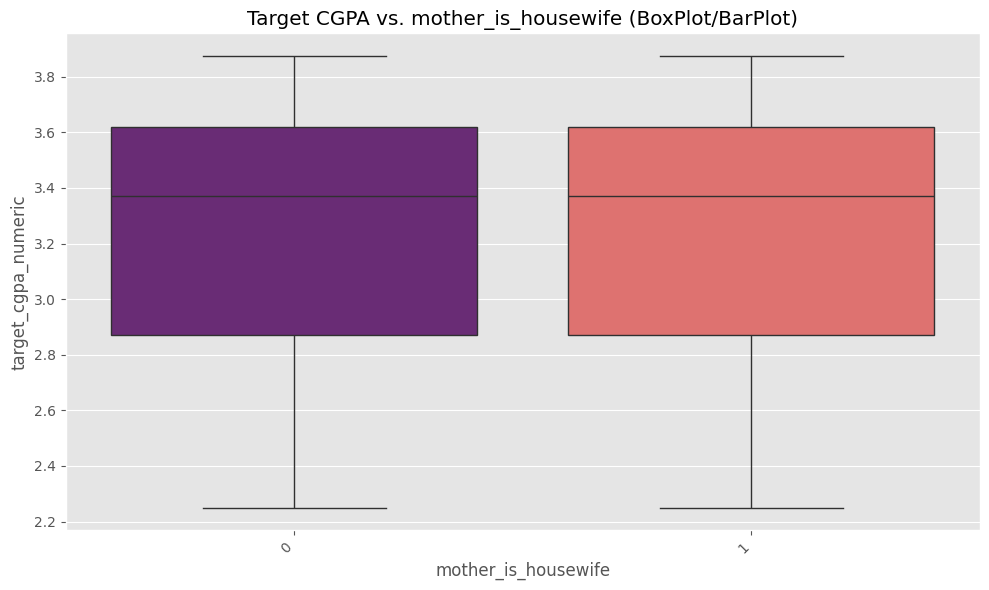

C:\Users\Shubh\AppData\Local\Temp\ipykernel_5880\3474915257.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='target_cgpa_numeric', data=df, palette='magma')


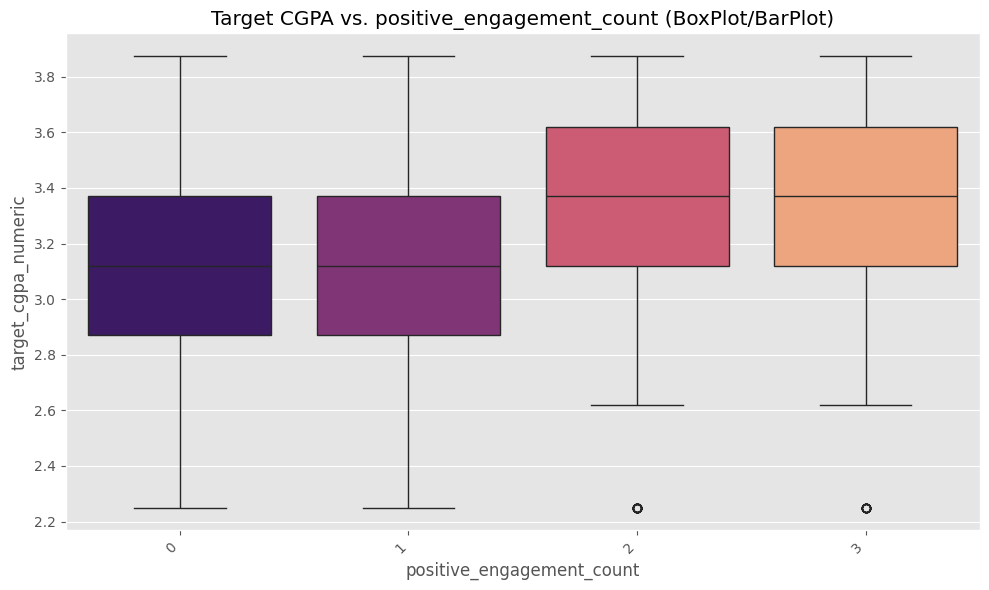

In [13]:
processed_numeric_ordinal_binary_cols_for_eda = [
    'students_age_numeric', 'family_income_numeric', 'number_of_siblings_numeric',
    'ssc_result_numeric', 'hsc_result_numeric', 'weekly_study_time_numeric', 'attendance_numeric',
    'gender_binary', # Already categorical-like, but good to check
    'scholarship_in_ssc_binary', 'scholarship_in_hsc_binary',
    'fathers_education_ordinal', 'mothers_education_ordinal',
    'taking_class_note_ordinal', 'sports_exercise_ordinal', 'taking_exam_preparation_ordinal',
    # Engineered features
    'avg_parental_education', 'total_scholarships', 'avg_previous_gpa',
    'study_engagement_score', 'mother_is_housewife', 'positive_engagement_count'
]

if 'target_cgpa_numeric' in df.columns and not df['target_cgpa_numeric'].isnull().all():
    for col in processed_numeric_ordinal_binary_cols_for_eda:
        if col in df.columns and col != 'target_cgpa_numeric': # Ensure column exists and is not the target itself
            # If the column is more continuous-like (many unique values)
            if df[col].nunique() > 10 and pd.api.types.is_numeric_dtype(df[col]):
                plt.figure(figsize=(8, 5))
                # sns.lmplot is a figure-level function, use regplot for axes-level plotting in a loop
                sns.regplot(x=col, y='target_cgpa_numeric', data=df, line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})
                plt.title(f'Target CGPA vs. {col} (Scatter with Regression Line)')
                plt.tight_layout()
                plt.show()
            # If it's discrete numeric, ordinal, or binary (few unique values)
            elif df[col].nunique() <= 10 and df[col].nunique() > 1:
                plt.figure(figsize=(10, 6))
                sns.boxplot(x=col, y='target_cgpa_numeric', data=df, palette='magma')
                # For binary, barplot of mean target might be clearer
                # sns.barplot(x=col, y='target_cgpa_numeric', data=df, palette='magma')
                plt.title(f'Target CGPA vs. {col} (BoxPlot/BarPlot)')
                plt.xticks(rotation=45, ha='right')
                plt.tight_layout()
                plt.show()
            # else:
                # print(f"Skipping plot for {col} due to single unique value or other reasons.")
        # else:
            # print(f"Column '{col}' not found or is target for EDA.")
else:
    print("Target variable 'target_cgpa_numeric' not available for processed features EDA.")

C:\Users\Shubh\AppData\Local\Temp\ipykernel_5880\3498498684.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='department', y='target_cgpa_numeric', data=df_top_dept, palette='tab20', order=top_departments)


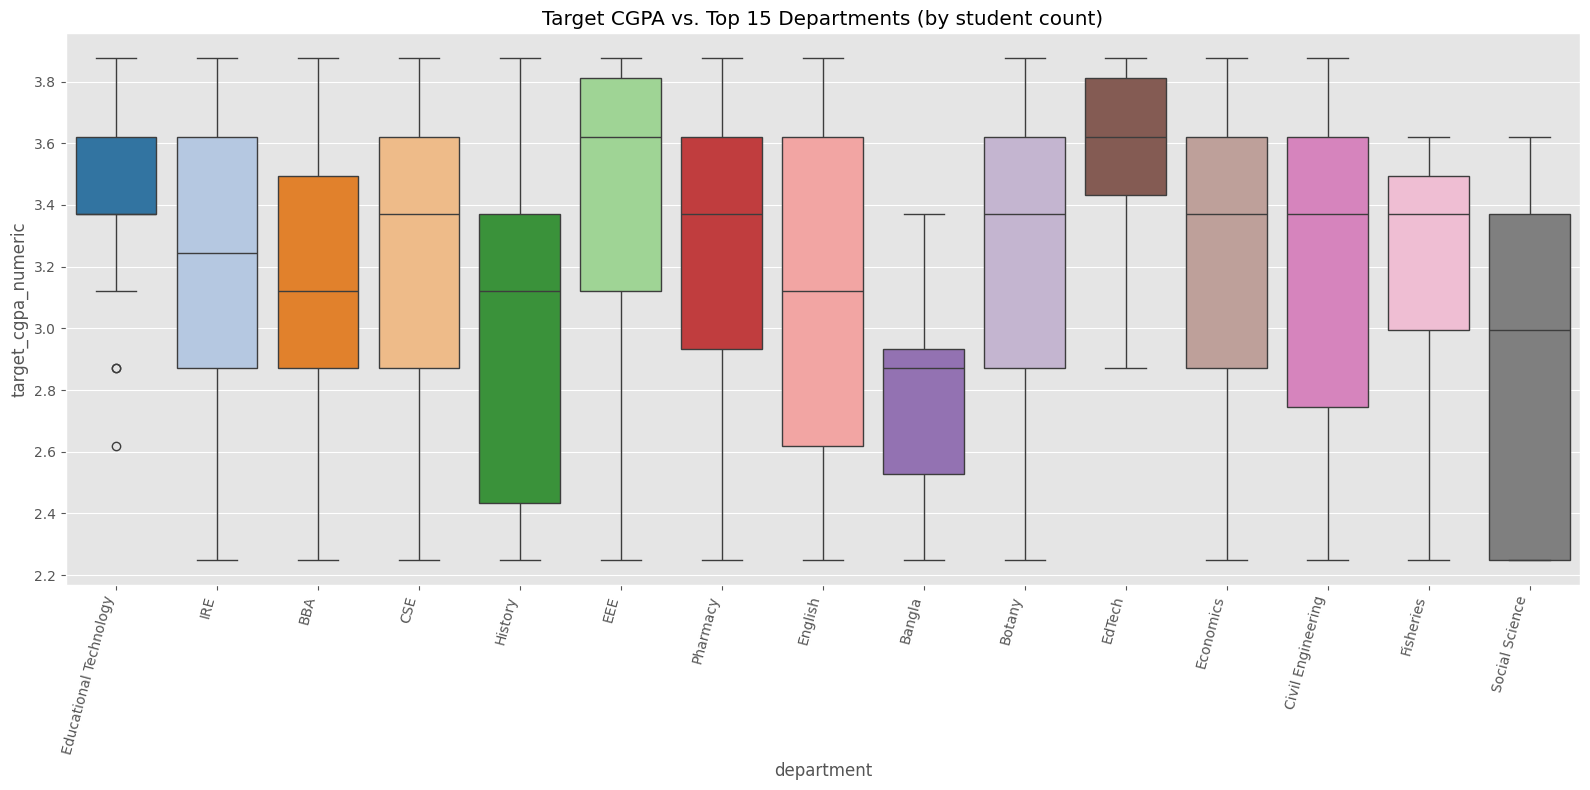

In [14]:
if 'department' in df.columns and 'target_cgpa_numeric' in df.columns and not df['target_cgpa_numeric'].isnull().all():
    if df['department'].nunique() < 25 and df['department'].nunique() > 1:
        plt.figure(figsize=(16, 8))
        sns.boxplot(x='department', y='target_cgpa_numeric', data=df, palette='tab20')
        plt.title('Target CGPA vs. Department')
        plt.xticks(rotation=75, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        # For many departments, show top N by count and their average CGPA
        top_n = 15
        if df['department'].nunique() >= top_n :
            department_counts = df['department'].value_counts()
            top_departments = department_counts.nlargest(top_n).index
            df_top_dept = df[df['department'].isin(top_departments)]

            plt.figure(figsize=(16, 8))
            sns.boxplot(x='department', y='target_cgpa_numeric', data=df_top_dept, palette='tab20', order=top_departments)
            plt.title(f'Target CGPA vs. Top {top_n} Departments (by student count)')
            plt.xticks(rotation=75, ha='right')
            plt.tight_layout()
            plt.show()
        elif df['department'].nunique() > 1: # Less than top_n but more than 1
            plt.figure(figsize=(16, 8))
            sns.boxplot(x='department', y='target_cgpa_numeric', data=df, palette='tab20')
            plt.title('Target CGPA vs. Department')
            plt.xticks(rotation=75, ha='right')
            plt.tight_layout()
            plt.show()
        else:
            print("Not enough department diversity to plot.")
else:
    print("Column 'department' or 'target_cgpa_numeric' not found or target is all NaN.")


## V. Next Steps (Conceptual - Before Modeling)

After this initial preprocessing and EDA, the following steps would typically be performed before training a model:

1.  **Handle Remaining Missing Values:**
    *   For numeric features: Impute with mean, median, or a model-based imputer (e.g., `KNNImputer`).
    *   For categorical features: Impute with the mode, or create a specific 'Missing' category if it's informative.
2.  **Encode Categorical Features:**
    *   **Nominal (no order):**
        *   `OneHotEncoder` (or `pd.get_dummies`) for features with low to moderate cardinality.
        *   For high cardinality features (like 'Department' if many, 'Father's Occupation'): Consider target encoding (carefully, to avoid leakage), frequency encoding, or grouping rare categories.
    *   **Ordinal (has order):** We've already mapped some to numeric (`_ordinal` columns). Ensure all ordinal features are numerically encoded according to their order.
3.  **Feature Scaling:**
    *   For models sensitive to feature scales (like SVM, KNN, Neural Networks, or regularized linear models), scale numeric features using `StandardScaler` or `MinMaxScaler`. Tree-based models like `ExtraTreesRegressor` are generally robust to feature scaling but it sometimes helps.
4.  **Feature Selection (Optional but often beneficial):**
    *   Remove features with very low variance.
    *   Use techniques like `SelectKBest`, `RFE (Recursive Feature Elimination)`, or feature importances from a baseline model to select the most relevant features.
5.  **Split Data:**
    *   Divide the dataset into training and testing sets (`X_train, X_test, y_train, y_test`) using `train_test_split`.
6.  **Drop Unnecessary Columns:**
    *   Remove raw string columns that have been processed (e.g., `students_age`, `target_cgpa_raw`).
    *   Remove any identifier columns if they exist.
    *   Remove columns used for intermediate steps if no longer needed.

Only after these steps would you typically proceed to train your `ExtraTreesRegressor` or other machine learning models.

## V. Final Preprocessing & Feature Preparation

This section completes the data preparation by:
1.  Handling remaining missing values.
2.  Encoding categorical features.
3.  Separating features (X) and target (y).
4.  Dropping unnecessary original/intermediate columns.
5.  Splitting data into training and testing sets.
6.  Scaling numeric features.

In [15]:
# Make a copy of the dataframe to work on for modeling
df_model = df.copy()

# --- 1. Handle Missing Target Variable ---
# Drop rows where the target variable is missing, as we can't use them for training/evaluation
print(f"Shape before dropping NaN targets: {df_model.shape}")
df_model.dropna(subset=['target_cgpa_numeric'], inplace=True)
print(f"Shape after dropping NaN targets: {df_model.shape}")

if df_model.empty:
    raise ValueError("DataFrame is empty after dropping NaN target values. Cannot proceed.")

# --- 2. Identify Columns for Imputation, Encoding, Scaling, and Dropping ---

# Columns that are already numeric (ordinal, binary, _numeric, engineered)
# These will need NaN imputation and scaling
numeric_features = []
# Add _numeric columns
numeric_features.extend([col for col in df_model.columns if col.endswith('_numeric') and col != 'target_cgpa_numeric'])
# Add _ordinal columns
numeric_features.extend([col for col in df_model.columns if col.endswith('_ordinal')])
# Add _binary columns
numeric_features.extend([col for col in df_model.columns if col.endswith('_binary')])
# Add engineered numeric features (ensure they are actually numeric and exist)
engineered_numeric_cols = [
    'avg_parental_education', 'total_scholarships', 'avg_previous_gpa',
    'study_engagement_score', 'mother_is_housewife', 'positive_engagement_count'
]
numeric_features.extend([col for col in engineered_numeric_cols if col in df_model.columns and df_model[col].dtype != 'object'])
numeric_features = list(set(numeric_features)) # Remove duplicates

print(f"\nIdentified Numeric Features ({len(numeric_features)}):")
# print(numeric_features)


# Categorical features for One-Hot Encoding
# These are typically 'object' type columns that are not raw versions of already processed features
# and are not the target.
# Also, some columns we standardized to 'NA_Category' or 'Other_Category' might be among these.
potential_categorical_for_ohe = df_model.select_dtypes(include=['object', 'category']).columns.tolist()

# Exclude already processed/raw versions or identifiers if any
# Let's list the original columns that became numeric/ordinal/binary to avoid re-encoding them if they are still objects
raw_cols_now_processed = [
    'students_age', 'gender', 'family_income_monthly', 'number_of_siblings',
    'ssc_result', 'hsc_result', 'weekly_study_time_at_home', 'attendance_in_class',
    'scholarship_in_ssc', 'scholarship_in_hsc', 'reading_scientific_books_articles_journals',
    'reading_non_scientific_books_articles_journals', 'any_co_curricular_activity',
    'attend_any_seminar_related_to_department', 'smoking', 'father_s_education',
    'mother_s_education', 'taking_class_note', 'sports_exercise', 'taking_exam_preparation',
    'target_cgpa_raw', 'father_s_education_cleaned', 'mother_s_education_cleaned'
]

categorical_features_for_ohe = [
    col for col in potential_categorical_for_ohe
    if col not in numeric_features # Should not happen if types are correct
    and col not in raw_cols_now_processed # Avoid original versions of processed features
]

print(f"\nIdentified Categorical Features for OHE ({len(categorical_features_for_ohe)}):")
# print(categorical_features_for_ohe)


# Columns to drop:
# All raw versions of features that have been numerically processed (_numeric, _ordinal, _binary)
# All intermediate cleaning columns (e.g., _cleaned)
# The original raw target column
cols_to_drop = raw_cols_now_processed

# Add any other specific columns if necessary (e.g., IDs if they existed)

print(f"\nColumns identified to be potentially dropped ({len(cols_to_drop)}).")
# We will drop these AFTER OHE and feature/target separation to ensure they are not needed by pd.get_dummies

# Sanity check: ensure target_cgpa_numeric is not in numeric_features or categorical_features_for_ohe
if 'target_cgpa_numeric' in numeric_features:
    numeric_features.remove('target_cgpa_numeric')
if 'target_cgpa_numeric' in categorical_features_for_ohe:
    categorical_features_for_ohe.remove('target_cgpa_numeric')

Shape before dropping NaN targets: (872, 61)
Shape after dropping NaN targets: (871, 61)

Identified Numeric Features (26):

Identified Categorical Features for OHE (11):

Columns identified to be potentially dropped (23).


In [16]:
from sklearn.impute import SimpleImputer

# Impute Numeric Features
if numeric_features: # Check if the list is not empty
    numeric_imputer = SimpleImputer(strategy='median')
    df_model[numeric_features] = numeric_imputer.fit_transform(df_model[numeric_features])
    print("\nMissing values in numeric features after imputation:")
    print(df_model[numeric_features].isnull().sum().sum()) # Sum of sums should be 0
else:
    print("\nNo numeric features identified for imputation.")


# Impute Categorical Features for OHE
if categorical_features_for_ohe: # Check if the list is not empty
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    df_model[categorical_features_for_ohe] = categorical_imputer.fit_transform(df_model[categorical_features_for_ohe])
    print("\nMissing values in categorical features (for OHE) after imputation:")
    print(df_model[categorical_features_for_ohe].isnull().sum().sum()) # Sum of sums should be 0
else:
    print("\nNo categorical features for OHE identified for imputation.")


Missing values in numeric features after imputation:
0

Missing values in categorical features (for OHE) after imputation:
0


In [17]:
# One-Hot Encode
if categorical_features_for_ohe:
    print(f"\nShape before OHE: {df_model.shape}")
    df_model = pd.get_dummies(df_model, columns=categorical_features_for_ohe, prefix=categorical_features_for_ohe, dummy_na=False)
    print(f"Shape after OHE: {df_model.shape}")
else:
    print("\nNo categorical features to one-hot encode.")

# Display some of the new OHE columns if created
# print(df_model.filter(like='department_').head()) # Example for department


Shape before OHE: (871, 61)
Shape after OHE: (871, 214)


In [18]:
# Define Target variable
y = df_model['target_cgpa_numeric']

# Define Features X by dropping the target and original/intermediate columns
X = df_model.drop(columns=['target_cgpa_numeric'])

# Drop original raw/intermediate columns that are no longer needed
# Ensure they exist in X.columns before trying to drop
actual_cols_to_drop = [col for col in cols_to_drop if col in X.columns]
X = X.drop(columns=actual_cols_to_drop, errors='ignore') # errors='ignore' in case some were already removed or not generated

print(f"\nShape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
# print("\nFeatures in X (first 5):")
# print(X.columns[:5].tolist())
# print("\nSample of X:")
# print(X.head())


Shape of X: (871, 190)
Shape of y: (871,)


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (696, 190), y_train shape: (696,)
X_test shape: (175, 190), y_test shape: (175,)


In [20]:
from sklearn.preprocessing import StandardScaler

# Identify numeric columns in the final X dataframe for scaling
# These are the original numeric_features plus any that resulted from OHE if they were numeric (unlikely for OHE)
# It's safer to re-identify based on dtypes from X_train
# OHE columns are uint8, which is fine for tree models but could be scaled too.
# Let's scale all columns that are not object (which should be none at this point).

# Get all feature names after OHE
# The 'numeric_features' list might not be fully accurate if some columns were dropped or not created
# Let's define scalable features as all columns in X_train (as OHE columns are also numeric-like)
# Tree-based models are generally insensitive to scaling, but for others or consistency, it's good.
# However, for pure tree-based comparison, you might skip scaling.
# Let's proceed with scaling for generality.

scaler = StandardScaler()

# Fit scaler on X_train and transform X_train & X_test
# Ensure all columns are numeric for scaler
# If any non-numeric columns remain in X, this will error. They should have been OHE'd.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames (optional, but good for inspection)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("\nData scaled. X_train_scaled_df sample:")
# print(X_train_scaled_df.head())


Data scaled. X_train_scaled_df sample:


## VI. Model Training and Evaluation

We will train and evaluate several regression models:
- Extra Trees Regressor
- Random Forest Regressor
- Gradient Boosting Regressor
- XGBoost Regressor
- LightGBM Regressor

We will then perform hyperparameter tuning on the best performing model(s).

In [21]:
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, r2_score

models = {
    "Extra Trees": ExtraTreesRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, objective='reg:squarederror'), # objective for regression
    "LightGBM": LGBMRegressor(random_state=42)
}

results = {}

print("\n--- Training and Evaluating Models (with scaled data) ---")
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled_df, y_train)
    y_pred = model.predict(X_test_scaled_df)

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MAE": mae, "R2": r2}

    print(f"{name} - MAE: {mae:.4f}, R2: {r2:.4f}")

# Optional: Train also on non-scaled data for tree models to see if scaling had an impact
# (Tree models are generally robust to feature scaling)
print("\n--- Training and Evaluating Tree Models (with NON-scaled data for comparison) ---")
tree_models_for_unscaled_comparison = {
    "Extra Trees (Unscaled)": ExtraTreesRegressor(random_state=42),
    "Random Forest (Unscaled)": RandomForestRegressor(random_state=42),
    "XGBoost (Unscaled)": XGBRegressor(random_state=42, objective='reg:squarederror'),
    "LightGBM (Unscaled)": LGBMRegressor(random_state=42)
}
for name, model in tree_models_for_unscaled_comparison.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train) # Using X_train (unscaled)
    y_pred = model.predict(X_test) # Using X_test (unscaled)

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Add to results if you want to keep these separate
    results[name] = {"MAE": mae, "R2": r2}
    print(f"{name} - MAE: {mae:.4f}, R2: {r2:.4f}")


results_df = pd.DataFrame(results).T.sort_values(by="R2", ascending=False)
print("\n--- Model Performance Summary ---")
print(results_df)


--- Training and Evaluating Models (with scaled data) ---
Training Extra Trees...
Extra Trees - MAE: 0.2403, R2: 0.5470
Training Random Forest...
Random Forest - MAE: 0.2309, R2: 0.6007
Training Gradient Boosting...
Gradient Boosting - MAE: 0.2497, R2: 0.5364
Training XGBoost...
XGBoost - MAE: 0.2152, R2: 0.6265
Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002353 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 239
[LightGBM] [Info] Number of data points in the train set: 696, number of used features: 67
[LightGBM] [Info] Start training from score 3.219705
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

In [22]:
from sklearn.model_selection import RandomizedSearchCV

# Based on initial results, choose the best model(s) for tuning.
# Let's assume ExtraTreesRegressor or LightGBM performed well.
# We'll tune ExtraTreesRegressor as an example, as it was your starting point.

best_model_name = results_df.index[0] # Get the name of the best model from sorted results
print(f"\n--- Hyperparameter Tuning for: {best_model_name} ---")

# Define parameter grid for ExtraTreesRegressor
# (Adjust based on which model is 'best_model_name')
if "Extra Trees" in best_model_name:
    param_grid_et = {
        'n_estimators': [100, 200, 300, 500, 700],
        'max_depth': [None, 10, 20, 30, 40],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', 0.5, 0.7, 1.0] # Replaced 'auto' with 'sqrt' or 1.0
    }
    base_estimator = ExtraTreesRegressor(random_state=42)
    search_params = param_grid_et
elif "LightGBM" in best_model_name:
    param_grid_lgbm = {
        'n_estimators': [100, 200, 500, 1000],
        'learning_rate': [0.01, 0.05, 0.1],
        'num_leaves': [20, 31, 40, 50],
        'max_depth': [-1, 10, 20, 30],
        'min_child_samples': [10, 20, 30],
        'subsample': [0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
    }
    base_estimator = LGBMRegressor(random_state=42)
    search_params = param_grid_lgbm
elif "XGBoost" in best_model_name:
    param_grid_xgb = {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7, 9],
        'subsample': [0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
        'gamma': [0, 0.1, 0.2]
    }
    base_estimator = XGBRegressor(random_state=42, objective='reg:squarederror')
    search_params = param_grid_xgb
else: # Default to ExtraTrees if no specific match or for Random Forest / Gradient Boosting
    param_grid_et = {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    if "Random Forest" in best_model_name:
        base_estimator = RandomForestRegressor(random_state=42)
    elif "Gradient Boosting" in best_model_name:
         base_estimator = GradientBoostingRegressor(random_state=42)
         # Add learning_rate for GB
         param_grid_et['learning_rate'] = [0.01, 0.05, 0.1]
    else:
        base_estimator = ExtraTreesRegressor(random_state=42) # Fallback
    search_params = param_grid_et


# Use appropriate data (scaled or unscaled) based on prior results or model type
# For tree models, unscaled often works as well or better.
# Let's check if the best model was an "Unscaled" version
if "(Unscaled)" in best_model_name:
    X_train_for_tuning = X_train
    X_test_for_tuning = X_test
    print("Using UNCALED data for tuning.")
else:
    X_train_for_tuning = X_train_scaled_df
    X_test_for_tuning = X_test_scaled_df
    print("Using SCALED data for tuning.")


# RandomizedSearchCV for efficiency
# For R2, higher is better. For MAE, use 'neg_mean_absolute_error' and lower (closer to 0) is better.
random_search = RandomizedSearchCV(
    estimator=base_estimator,
    param_distributions=search_params,
    n_iter=50,  # Number of parameter settings that are sampled. Adjust as needed.
    cv=5,       # Number of cross-validation folds.
    scoring='r2', # Or 'neg_mean_absolute_error'
    verbose=1,
    random_state=42,
    n_jobs=-1   # Use all available cores
)

random_search.fit(X_train_for_tuning, y_train)

print("\nBest parameters found: ", random_search.best_params_)
print(f"Best cross-validation R2 score: {random_search.best_score_:.4f}")

best_tuned_model = random_search.best_estimator_


--- Hyperparameter Tuning for: LightGBM (Unscaled) ---
Using UNCALED data for tuning.
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000821 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 183
[LightGBM] [Info] Number of data points in the train set: 696, number of used features: 67
[LightGBM] [Info] Start training from score 3.219705
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain


--- Final Evaluation of Tuned Model ---
Tuned LightGBM (Unscaled) - MAE: 0.2170, R2: 0.6402

Improvement over initial best LightGBM (Unscaled):
  MAE: From 0.2137 to 0.2170 (Change: 0.0033)
  R2:  From 0.6462 to 0.6402 (Change: -0.0060)

Top 20 Feature Importances from tuned model:
                                               feature  importance
20                              avg_parental_education         384
23                              study_engagement_score         299
2                           number_of_siblings_numeric         235
1                                family_income_numeric         215
16                           mothers_education_ordinal         212
25                           positive_engagement_count         173
15                           fathers_education_ordinal         170
6                                   attendance_numeric         132
10   reading_non_scientific_books_articles_journals...         128
14                                       gende

C:\Users\Shubh\AppData\Local\Temp\ipykernel_5880\2162497812.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20), palette='viridis')


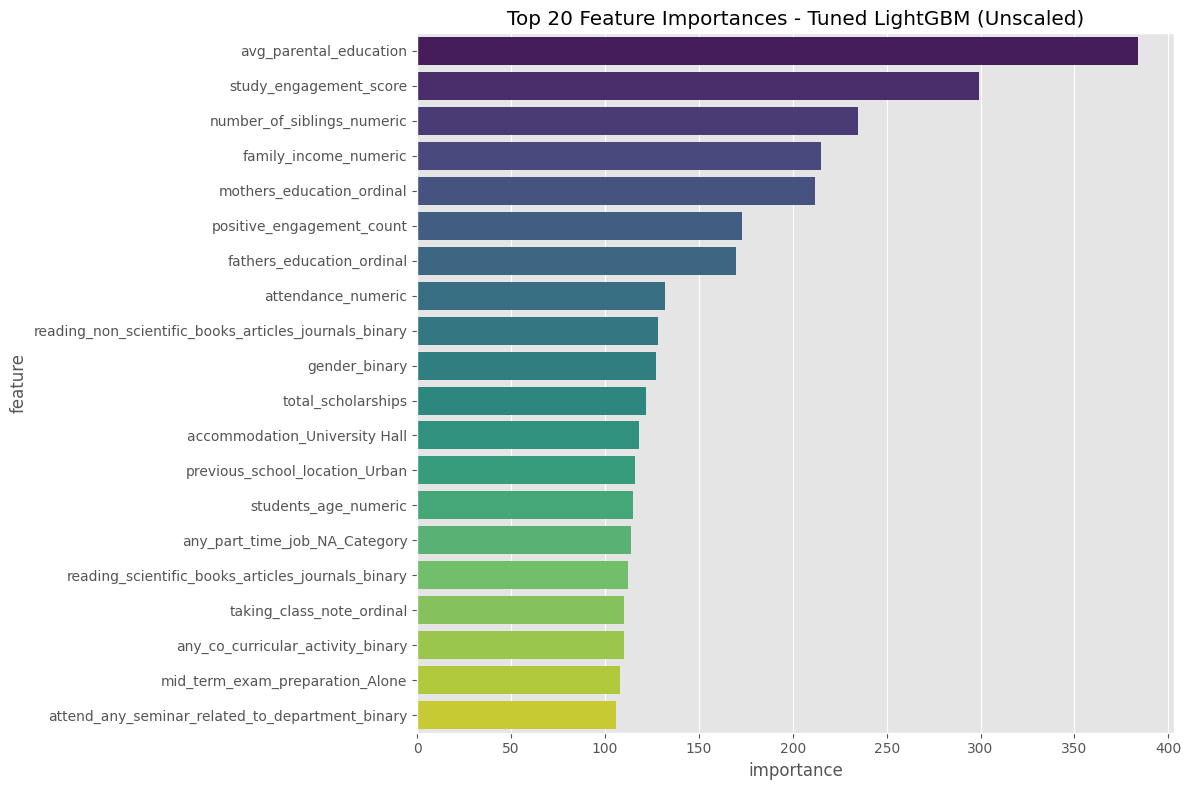

In [23]:
print("\n--- Final Evaluation of Tuned Model ---")
y_pred_tuned = best_tuned_model.predict(X_test_for_tuning) # Use the same X_test (scaled/unscaled) as for tuning

final_mae = mean_absolute_error(y_test, y_pred_tuned)
final_r2 = r2_score(y_test, y_pred_tuned)

print(f"Tuned {best_model_name} - MAE: {final_mae:.4f}, R2: {final_r2:.4f}")

# Compare with the best initial model's performance
original_best_perf = results_df.iloc[0]
print(f"\nImprovement over initial best {best_model_name}:")
print(f"  MAE: From {original_best_perf['MAE']:.4f} to {final_mae:.4f} (Change: {final_mae - original_best_perf['MAE']:.4f})")
print(f"  R2:  From {original_best_perf['R2']:.4f} to {final_r2:.4f} (Change: {final_r2 - original_best_perf['R2']:.4f})")

# Feature Importances (for tree-based models)
if hasattr(best_tuned_model, 'feature_importances_'):
    importances = best_tuned_model.feature_importances_
    feature_names = X_train_for_tuning.columns # Get feature names from the data used for tuning
    
    # Create a DataFrame for better visualization
    feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
    
    print("\nTop 20 Feature Importances from tuned model:")
    print(feature_importance_df.head(20))
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20), palette='viridis')
    plt.title(f'Top 20 Feature Importances - Tuned {best_model_name}')
    plt.tight_layout()
    plt.show()

## VII. Conclusion & Further Steps

(Summarize your findings here based on the R2 and MAE scores. Discuss which model performed best and the impact of hyperparameter tuning. Mention key features if feature importance was analyzed.)

**Further Steps could include:**
-   More advanced feature engineering (e.g., interaction terms).
-   Trying other complex models or ensemble techniques like stacking.
-   More exhaustive hyperparameter search (e.g., GridSearchCV or Bayesian Optimization).
-   Deeper investigation into feature importances and their implications.
-   Collecting more data or different types of features if performance is not satisfactory.
-   Error analysis: Investigate where the model is making the largest errors.